# Projects Proposal Screening at DonorsChoose #

## Introduction ##
DonorsChoose.org is a United States–based 501(c)(3) nonprofit organization that allows individuals to donate directly to public school classroom projects. Founded in 2000 by former public school teacher Charles Best, DonorsChoose.org was among the first civic crowdfunding platforms of its kind. The organization has been given Charity Navigator’s highest rating every year since 2005. In January 2018, they announced that 1 million projects had been funded. In 77% of public schools in the United States, at least one project has been requested on DonorsChoose.org. Schools from wealthy areas are more likely to make technology requests, while schools from less affluent areas are more likely to request basic supplies. It's been noted that repeat donors on DonorsChoose typically donate to projects they have no prior relationship with, and most often fund projects serving financially challenged students.<br>
<br>
Charles envisioned a platform for individuals to connect directly with classrooms in need, providing materials requested by teachers. With the help of his students, he built the first version of the site in his classroom and invited colleagues to post material requests. Charles anonymously funded the first 10 project requests to demonstrate the effectiveness of the site.

In 2003, the Oprah Winfrey Show featured Charles Best in a segment on Innovative Teachers, which aired on June 20. Traffic generated from the show crashed the site, but viewers donated $250,000 to classroom projects. The sustained exposure from the Oprah Winfrey Show allowed DonorsChoose.org to expand from the New York City region to key metropolitan areas across the country.

In 2006, following the destruction of hurricanes Katrina and Rita, the site opened to public school teachers in Louisiana, Mississippi, Alabama, and Texas. In 2007, the site opened to every public school in the United States.

As of September 2016, donors have contributed over $400 million to fund more than 750,000 classroom projects posted on the site, reaching 19 million students in public schools across the United States

## Dataset ##
**About this Dataset**
The dataset contains information from teachers' project applications to DonorsChoose.org including teacher attributes, school attributes, and the project proposals including application essays. Your objective is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved.

File descriptions<br>
train.csv - the training set<br>
test.csv - the test set<br>
resources.csv - resources requested by each proposal; joins with test.csv and train.csv on id<br>
sample_submission.csv - a sample submission file in the correct format<br>
**Data fields**<br>
test.csv and train.csv:
* id - unique id of the project application
* teacher_id - id of the teacher submitting the application
* teacher_prefix - title of the teacher's name (Ms., Mr., etc.)
* school_state - US state of the teacher's school
* project_submitted_datetime - application submission timestamp
* project_grade_category - school grade levels (PreK-2, 3-5, 6-8, and 9-12)
* project_subject_categories - category of the project (e.g., "Music & The Arts")
* project_subject_subcategories - sub-category of the project (e.g., "Visual Arts")
* project_title - title of the project
* project_essay_1 - first essay*
* project_essay_2 - second essay*
* project_essay_3 - third essay*
* project_essay_4 - fourth essay*
* project_resource_summary - summary of the resources needed for the project
* teacher_number_of_previously_posted_projects - number of previously posted applications by the submitting teacher
* project_is_approved - whether DonorsChoose proposal was accepted (0="rejected", 1="accepted"); train.csv only

**Note:** Prior to May 17, 2016, the prompts for the essays were as follows:<br>
* project_essay_1: "Introduce us to your classroom"
* project_essay_2: "Tell us more about your students"
* project_essay_3: "Describe how your students will use the materials you're requesting"
* project_essay_4: "Close by sharing why your project will make a difference"

Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:

project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."

project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"

For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.

resources.csv:<br>
Proposals also include resources requested. Each project may include multiple requested resources. Each row in resources.csv corresponds to a resource, so multiple rows may tie to the same project by id.<br>
* id - unique id of the project application; joins with test.csv. and train.csv on id
* description - description of the resource requested
* quantity - quantity of resource requested
* price - price of resource requested

------------------------------------------------------------------------------------------------

## EDA ##
In this section we will try to answer some analytical questions related to the project.<br>
   1) States wise analysis on which states has the highest number of approved applications.<br>
   2) How is the male vs female class teacher approval rate?<br>
   3) Which grades classification has the highest number of approval?<br>
   4) What are the subject categories and subcategories which has been approved/rejected<br>
   5) Time Series analysis on which month has the highest number of project proposal submitted? Which Day of the week has the highest number of submission? Which period of the day Teachers prefer submission of project proposal.<br>
   6) How the number of previously posted proposals affect the approval rate.<br>
   7) Requested resources and the price, what is the price range which has the highest number of project submission and approvals  What is the ratio of approval/rejection in terms of price of the requested resource.<br>
   8) **Text Analysis:** In this section we will perform some text related anylsis on text columns of the trainig dataset.<br><br>
                 8.1) **Project Title**: What are the highly used words in the project title? what are the numbers of words per project title?<br>
                 8.2) **Essay**: what are the words highly used in this section.<br>
                 8.3 **Resource Summary**: Are there common words in approved and rejected projects, which are highly used in proposals.<br>


Since most of our EDA is based on the **approval rate** i.e. number of **approved** proposal divided by total number of **submission** in a particular category. Hence Let's find out what is the total approval rate at the **_DonorsChoose.org_**. 

In [178]:
# General libraries which would be needed for this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# imports for plotly plot for usa map in the project.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import datetime
import calendar

import matplotlib.patches as mpatches

# get rid of warnings
import warnings
warnings.filterwarnings("ignore")

# import necessary modules for the NLP.
import re    
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

lem = WordNetLemmatizer()
eng_stopwords = set(stopwords.words("english"))

In [46]:
total_proposal = df_train.shape[0]
print("Total number of proposal submitted to DonorsChoose.org is:",total_proposal)

# find out the total numbers of approved proposal
approved_proposal = df_train[df_train['project_is_approved']==1].shape[0]
print("Total number of approved proposals at DonorsChoose.org is:", approved_proposal)

approval_rate = round(100 * approved_proposal/total_proposal, 2)
print('Approval Rate at DonorsChoose.org is '+ str(approval_rate)+'%')

Total number of proposal submitted to DonorsChoose.org is: 182080
Total number of approved proposals at DonorsChoose.org is: 154346
Approval Rate at DonorsChoose.org is 84.77%


**Total Approval Rate** turned out be quite good at almost **85%**. It means if someone submit proposal at _DonorsChoose.org_, there is 85% chance that his proposal will be approved. 

### 1) States wise analysis on which states has the highest number of approved applications. ###

In [2]:
# read csv file into dataframe: df_train
df_train = pd.read_csv("train.csv")

In [3]:
# print first two rows of data to see how data looks like
df_train.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0


In [4]:
# basic information about the newly created dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

There are 182080 records are there in the training dataset. Except project_essay_3, project_essay_4 and teacher prefix all other columns has no NaN values. We would handle when we work with that particular field.

In [5]:
# create dataframe to count total number of applications submitted in each state: states_all
states_all = df_train.groupby('school_state')['project_is_approved'].agg('count').reset_index()
states_all.head()

,school_state,project_is_approved
0,AK,557
1,AL,2955
2,AR,1757
3,AZ,3614
4,CA,25695


In [6]:
# rename column name project_is_approved to more suitable name
states_all.rename(columns={'project_is_approved':'total', 'school_state':'state'}, inplace=True)

# print first two records to make sure that the column name has changed. 
states_all.head(2)

,state,total
0,AK,557
1,AL,2955


In [7]:
# create dataframe to count total number of approved applications submitted
# in each state: states_approved
state_approved = df_train.groupby('school_state')['project_is_approved'].agg('sum').reset_index()
state_approved.head(2)

,school_state,project_is_approved
0,AK,473
1,AL,2507


In [8]:
# rename column name project_is_approved to more suitable name
state_approved.rename(columns={'project_is_approved':'approved', 'school_state':'state'},
                      inplace=True)

# print first two records to make sure that the column name has changed. 
state_approved.head(2)

,state,approved
0,AK,473
1,AL,2507


In [9]:
# merge the two dataframe to create one dataframe: state_df
state_df = pd.merge(states_all, state_approved, on='state')
state_df.head(2)

,state,total,approved
0,AK,557,473
1,AL,2955,2507


In [10]:
# make sure the merged dataframe has 51 records, i.e. for 50 states and DC
state_df.shape

(51, 3)

In [11]:
# derive column 'rejected' after subtracting approved column from total column
state_df['rejected'] = state_df['total'] - state_df['approved']
state_df.head(2)

,state,total,approved,rejected
0,AK,557,473,84
1,AL,2955,2507,448


In [12]:
state_df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')

In [13]:
# save this dataframe to csv file, it may help in case we run into memory issue.
state_df.to_csv('state.csv', index=False)

**Visualization** of the total application submission from each state and approvals/rejections. Let's start by looking at the total number of project proposal submitted in each state on the USA map.

In [16]:
# create dataframe with the total proposals submitted in descending order: total_submission_state
total_submission_state = state_df[['state','total']].sort_values(by=['total'], ascending=False).set_index('state')

# print the top 5 states with total number of proposals submitted.
total_submission_state.head(5)

,total
state,
CA,25695
TX,12304
NY,12157
FL,10359
NC,8463


In [19]:
# define color scale
color_scale = [[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'],
               [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']]

# define map data and layout.
data = [ dict(
        type='choropleth',
        colorscale = color_scale,
        autocolorscale = False,
        locations = state_df['state'],
        z = state_df['total'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "No of Proposals Submitted"
        )
    ) ]

layout = dict(
        title = 'Total Submitted Proposals at DonorChoose',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

AS we can see that the **California** has the highest number of submission in the U.S. **Texas, New york**, and **Florida** are on 2nd, 3rd and 4th position respectively.<br>
Let's check out if the list of states with highest **approved proposals** is also same or similar. 

In [17]:
# create dataframe with the total approved proposals in descending order: total_approved_state
total_approved_state = state_df[['state','approved']].sort_values(by=['approved'], ascending=False).set_index('state')

# print the top 5 states with total number of proposals submitted.
total_approved_state.head(5)

,approved
state,
CA,22006
NY,10377
TX,10036
FL,8541
NC,7223


In [20]:
# define color scale
color_scale = [[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'],
               [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']]

# define map data and layout.
data = [ dict(
        type='choropleth',
        colorscale = color_scale,
        autocolorscale = False,
        locations = state_df['state'],
        z = state_df['approved'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "No of Approved Proposal"
        )
    ) ]

layout = dict(
        title = 'Approved Proposal at DonorChoose',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

This looks pretty much similar to the total submission map, with **California** again top in the list and **New York** and **Texas** to follow. So when the number of submission is high the number of approved proposals are also high.<br>
So I think it would be interesting to see how is the ratio of **Approval and Rejection** in each of the states. Let's find it out.

In [21]:
# To find the ratio we want to calculate the percentage (%) of approved and rejected column.
# First we will calculate the approved percentage and store the values in the same state_df dataframe with column name
# as 'aprv_perc'
state_df['aprv_perc'] = (state_df['approved']/state_df['total'])*100

# now will create another column as 'rejc_perc' to store rejection percentage.
state_df['rejc_perc'] = 100 - state_df['aprv_perc']

# Print the head of dataframe to make sure everthing is fine
state_df.head(2)

,state,total,approved,rejected,aprv_perc,rejc_perc
0,AK,557,473,84,84.919210,15.080790
1,AL,2955,2507,448,84.839255,15.160745


In [22]:
# Newly created 2 column are upto 6 places after decimal. We may want to round it off to only 2 decimal points.
# create list of columns: cols
cols = ['aprv_perc','rejc_perc']
state_df[cols] = state_df[cols].apply(lambda x: round(x,2))

# print the dataframe to veify the changes.
state_df.head(2)

,state,total,approved,rejected,aprv_perc,rejc_perc
0,AK,557,473,84,84.92,15.08
1,AL,2955,2507,448,84.84,15.16


In [23]:
# save this itermediate dataframe to csv file.
state_df.to_csv('state_aprv_rejc_perc.csv', index=False)

In [27]:
# create dataframe to store only the percentage columns: apr_rejc
aprv_rejc = state_df[['state','aprv_perc','rejc_perc']].sort_values(by='aprv_perc').set_index('state')
aprv_rejc.head(2)

,aprv_perc,rejc_perc
state,,
DC,81.26,18.74
TX,81.57,18.43


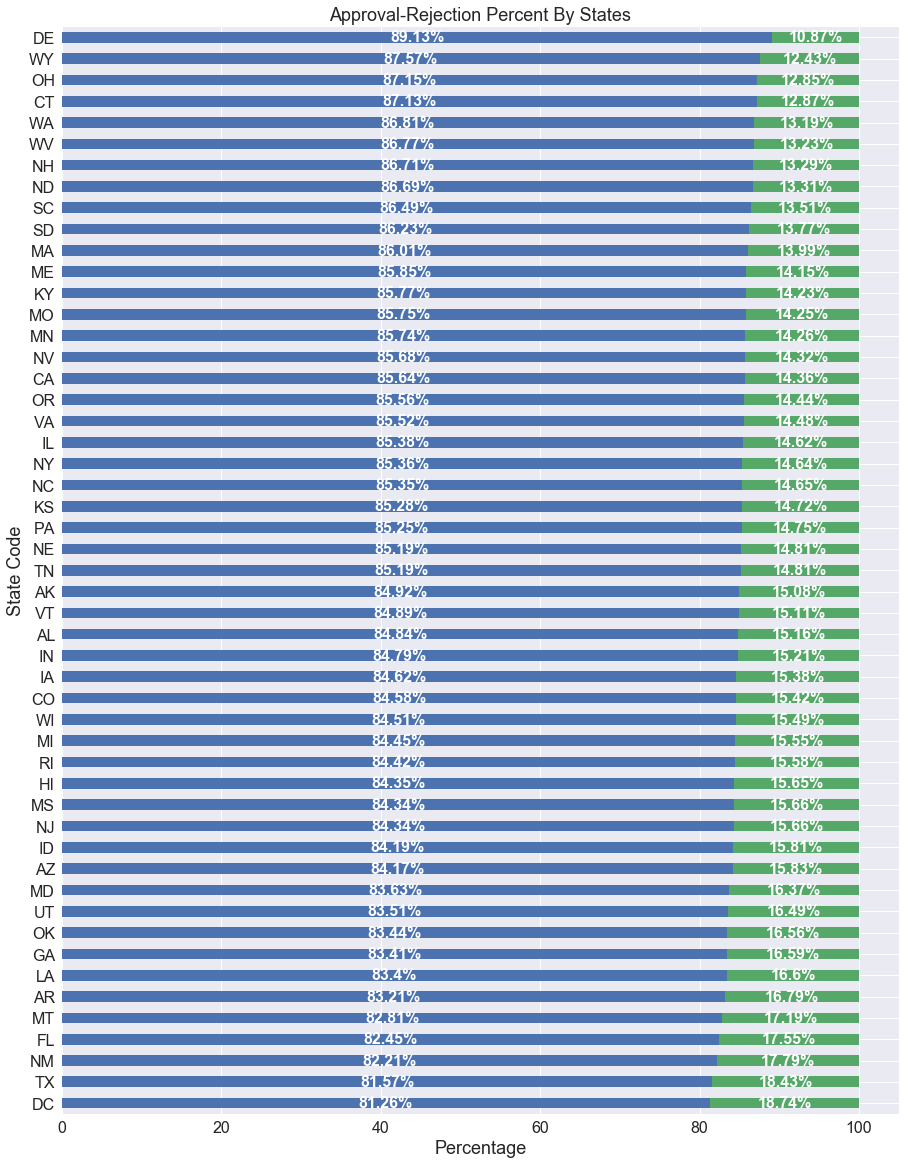

In [28]:
ax = aprv_rejc.plot.barh(title="Approval-Rejection Percent By States",
                             legend=False, figsize=(15,20), stacked=True, fontsize=16)
labels = []
for j in aprv_rejc.columns:
    for i in aprv_rejc.index:
        label = aprv_rejc.loc[i][j]
        #label = format(label, '.0f')
        labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center',
               fontsize=16, fontweight="bold", color="white")
plt.title("Approval-Rejection Percent By States", fontsize=18 )
plt.xlabel("Percentage", fontsize=18)
plt.ylabel("State Code", fontsize=18)
#plt.legend(fontsize=18)
plt.show()

**Findings**: 
   * All the states has more than **81%** of approvals of the total proposals submitted to *DonorsChoose.org*
   * **Washington D.C**, **Texas** and **New Mexico** have slightly higher rejections compared to other states.
   * Small state in east **Delaware** has the highest approval rate followed by **Wyoming** and **Ohio**.

### 2) How is the male vs female class teacher approval rate? ###
In this section we will have a brief look at how is the proposal submission and approval rate by **_gender_** of class teacher.

In [29]:
# create a dataframe with only the required field : tchr_gender
tchr_gender = df_train[['school_state','teacher_prefix','project_is_approved']]
tchr_gender.head(2)

,school_state,teacher_prefix,project_is_approved
0,NV,Ms.,1
1,GA,Mrs.,0


As there is no direct column to identify a teacher as male or female, we have to create a new column "gender" based on the teacher_prefix.

In [30]:
# check what all the unique prefixes in the dataframe.
tchr_gender.teacher_prefix.unique()

array(['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.', nan], dtype=object)

It looks like there are some nan values as well. We can make them as **Teacher** as teacher looks so most suitable in this case. <br>
Also we will categories the gender as below:
   * __Female__    : 'Ms.', 'Mrs'
   * __Male__      : 'Mr.'
   * __Not Known__ : 'Teacher','Dr.'

In [32]:
# fill all the nan values with Teacher
tchr_gender = tchr_gender.fillna('Teacher', axis=1)
tchr_gender.teacher_prefix.unique()

array(['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.'], dtype=object)

In [33]:
# create a new column based on the values of teacher_prefix column.
gender=[]
for v in tchr_gender.teacher_prefix:
    if v in ['Mrs.','Ms.']:
        gender.append('Female')
    if v in ['Mr.']:
        gender.append('Male')
    if v in ['Dr.','Teacher']:
        gender.append('Not Known')

# creating new column next to prefix column to make it more readable.
tchr_gender.insert(2, 'gender', gender)
tchr_gender.head()

,school_state,teacher_prefix,gender,project_is_approved
0,NV,Ms.,Female,1
1,GA,Mrs.,Female,0
2,UT,Ms.,Female,1
3,NC,Mr.,Male,0
4,CA,Mr.,Male,1


In [34]:
# group by gender and calculate the number of submission in each group: gender_count
gender_count = tchr_gender.groupby('gender')['project_is_approved'].count().reset_index()
gender_count.head()

,gender,project_is_approved
0,Female,160471
1,Male,17667
2,Not Known,3942


In [35]:
# group by gender and calulate the number of approved proposals: gender_aprv 
gender_aprv = tchr_gender.groupby('gender')['project_is_approved'].sum().reset_index()
gender_aprv.head()

,gender,project_is_approved
0,Female,136338
1,Male,14876
2,Not Known,3132


In [36]:
# rename columns 'project_is_approved' with suitable names in both the dataframes
gender_count.rename(columns={'project_is_approved':'total'}, inplace=True)
gender_aprv.rename(columns={'project_is_approved':'approved'}, inplace=True)

In [37]:
# merge the two datafrare on gender column: gender
gender=pd.merge(gender_count, gender_aprv, on='gender' )
gender.head()

,gender,total,approved
0,Female,160471,136338
1,Male,17667,14876
2,Not Known,3942,3132


In [38]:
# create a column which will have the approval percientage in each category.
gender['aprv_perc'] = (100 * gender['approved']/gender['total']).apply(lambda x: round(x,2))
gender.head(3)

,gender,total,approved,aprv_perc
0,Female,160471,136338,84.96
1,Male,17667,14876,84.20
2,Not Known,3942,3132,79.45


Now the dataframe is in the desired form. Now let's put it on pie chart to see how is the coverage by gender.

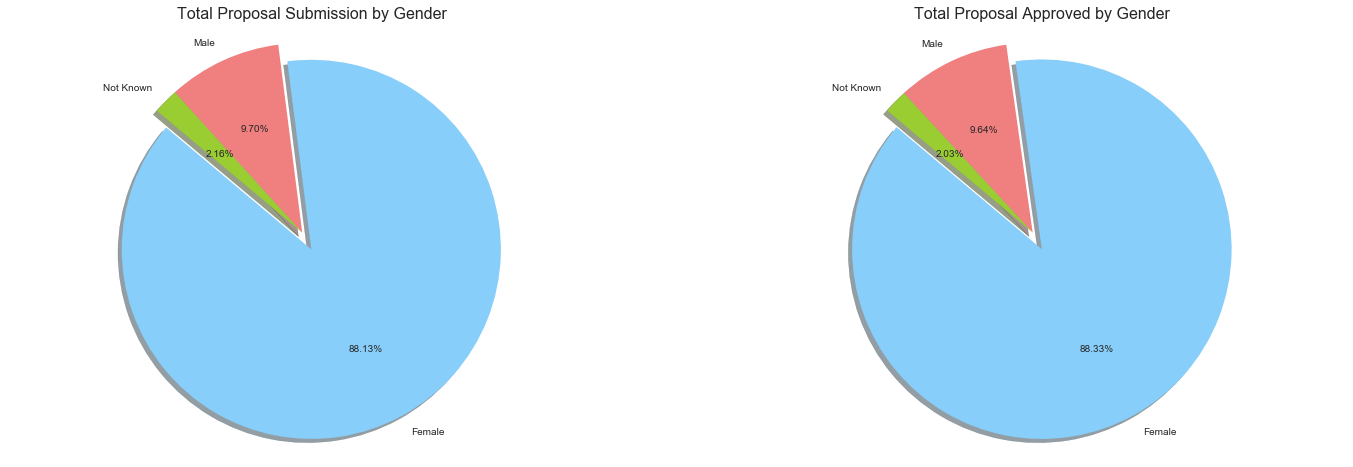

In [42]:
# subplots setting so that we can have two pie chart side by side
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)

# Data to first plot
labels = gender['gender'].values
sizes = gender['total'].values
colors = [ 'lightskyblue', 'lightcoral','Yellowgreen']

#explode the biggest slice of the pie chart.
explode = []
sizes = gender['total'].values
m=sizes.max()
for indx, s in enumerate(sizes):
    explode.append(0)
    if s>=m:
        m=s
        explode[indx]=0.1

explode=tuple(explode)
 
# First plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%.2f%%', shadow=True, startangle=140)

plt.title('Total Proposal Submission by Gender', fontsize=16) 
plt.axis('equal')

# data to second plot
plt.subplot(1,2,2)
labels = gender['gender'].values
sizes = gender['approved'].values
#colors = ['lightcoral', 'lightskyblue', 'Yellowgreen']

#explode the biggest slice of the pie chart.
explode = []
sizes = gender['approved'].values
m=sizes.max()
for indx, s in enumerate(sizes):
    explode.append(0)
    if s>=m:
        m=s
        explode[indx]=0.1

explode=tuple(explode)
 
# Second plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.2f%%', shadow=True, startangle=140)

plt.title('Total Proposal Approved by Gender', fontsize=16) 
plt.axis('equal')
plt.show()

**Female** category has the highest number of submission and hence approved proposals from Female teachers are very high. Since this doesn't tell as about the ratio of the approval rate by each gender category lets check it out in the below chart.

In [43]:
# create a dataframe indexed as gender for visualization purpose only: gender_index_df
gender_index_df = gender.set_index('gender')
gender_index_df

,total,approved,aprv_perc
gender,,,
Female,160471,136338,84.96
Male,17667,14876,84.20
Not Known,3942,3132,79.45


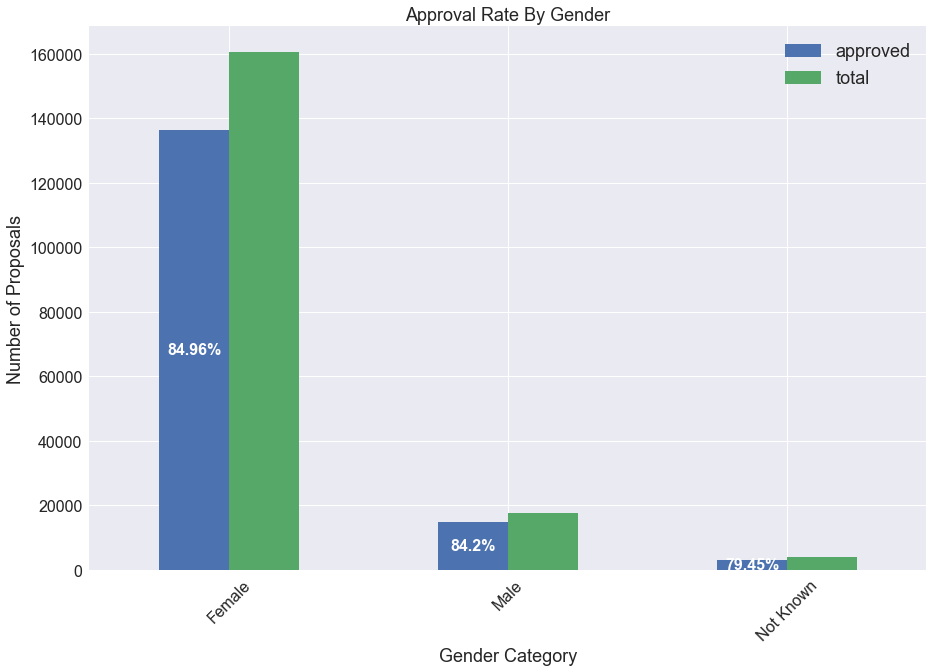

In [45]:
ax = gender_index_df[['approved','total']].plot.bar(title="Approval-Rejection Percent By States",
                             legend=False, figsize=(15,10), fontsize=16, rot=45)
labels = []
for j in gender_index_df.columns:
    if j=='aprv_perc':
        for i in gender_index_df.index:
            label = gender_index_df.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center',
               fontsize=16, fontweight="bold", color="white")
plt.title("Approval Rate By Gender", fontsize=18 )
plt.xlabel("Gender Category", fontsize=18)
plt.ylabel("Number of Proposals", fontsize=18)
plt.legend(fontsize=18)
plt.show()

Now it is pretty clear that **Male** and **Female** approval rate is almost same around **84%** and **85%** respectively. Even teahcers with not know gender has a very good approval rate of almost **80%.**<br>
However project proposal submitted by **female** teacher is very high of **88%** compared to male which is only **10%** of the total submission. There are around **2%** of teachers who can't be identified as male or female.

### 3) Which grades classification has the highest number of approval?###
In this section we will try to find out the approval rates based on the **grade** of for which the proposal has been submitted.

In [48]:
# check for unique grades in the training dataset
df_train.project_grade_category.unique()

array(['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'], dtype=object)

In [47]:
# Create dataframe for total number of submission in each grade we need and grouped by grades: grades_total_submission
grades_total_submission = df_train.groupby('project_grade_category')['project_is_approved'].count().reset_index()
grades_total_submission.head(5)

,project_grade_category,project_is_approved
0,Grades 3-5,61682
1,Grades 6-8,28197
2,Grades 9-12,18311
3,Grades PreK-2,73890


In [49]:
# create dataframe for all approved proposals in each grades: grades_approved_submission
grades_approved_submission = df_train.groupby('project_grade_category')['project_is_approved'].sum().reset_index()
grades_approved_submission.head(5)

,project_grade_category,project_is_approved
0,Grades 3-5,52675
1,Grades 6-8,23783
2,Grades 9-12,15294
3,Grades PreK-2,62594


In [50]:
# rename column name to make it more readable.
grades_total_submission.rename(columns={'project_is_approved':'total','project_grade_category':'grades'},
                               inplace=True)
grades_approved_submission.rename(columns={'project_is_approved':'approved','project_grade_category':'grades'},
                                  inplace=True)

# merge the two dataframe to create just one.
grades_df=pd.merge(grades_total_submission, grades_approved_submission, on='grades')
grades_df.head()

,grades,total,approved
0,Grades 3-5,61682,52675
1,Grades 6-8,28197,23783
2,Grades 9-12,18311,15294
3,Grades PreK-2,73890,62594


In [51]:
# calculate the percentage approval rate:
grades_df['aprv_perc'] = (100 * grades_df['approved']/grades_df['total']).apply(lambda x: round(x,2))
grades_df.head()

,grades,total,approved,aprv_perc
0,Grades 3-5,61682,52675,85.40
1,Grades 6-8,28197,23783,84.35
2,Grades 9-12,18311,15294,83.52
3,Grades PreK-2,73890,62594,84.71


In [52]:
# set index to grades
grades_df.set_index('grades', inplace=True)

In [53]:
# sort it by number of appications submitted
grades_df.sort_values(by=['total'], inplace=True, ascending=False)

We have all the numbers we need for the visualization. Let's plot total number of submission and the percentage for each grade section side by side.

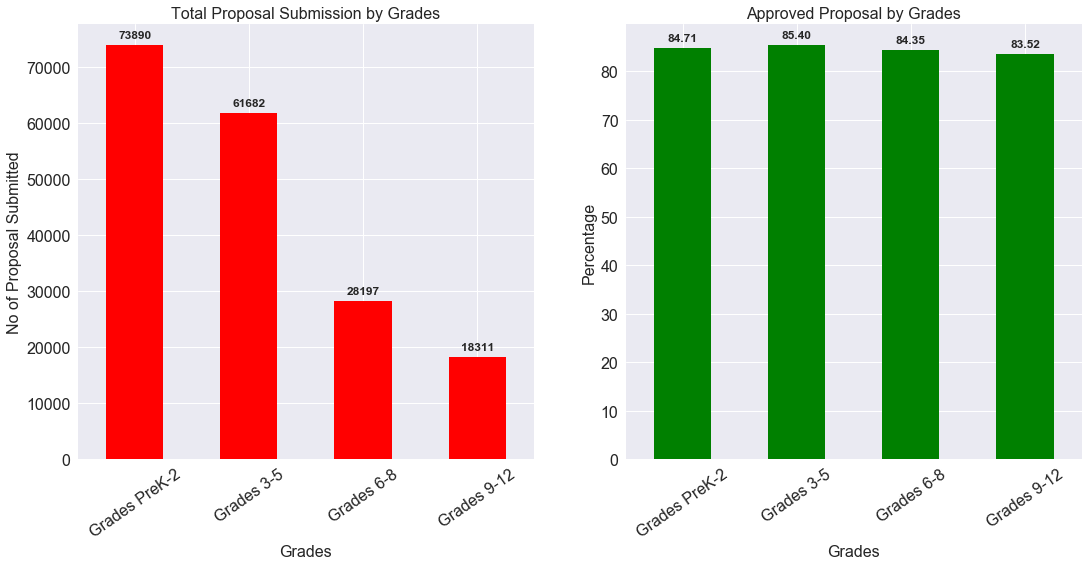

In [57]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
ax1 = grades_df['total'].plot.bar(rot=35, fontsize=16, color='red')
plt.title("Total Proposal Submission by Grades", fontsize=16)
plt.xlabel('Grades', fontsize=16)
plt.ylabel('No of Proposal Submitted',fontsize=16)

# annotation for first graph
# For each bar: Place a label
rects1 = ax1.patches
for rect in rects1:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:.0f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),        
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va, fontweight='bold', size=12) 


plt.subplot(1,2,2)
ax2 = grades_df['aprv_perc'].plot(kind='bar', rot=35, fontsize=16, color='green')
plt.title('Approved Proposal by Grades', fontsize=16)
plt.xlabel('Grades',fontsize=16)
plt.ylabel('Percentage', fontsize=16)

# annote graph 2
rects2 = ax2.patches
for rect in rects2:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                  
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va, fontweight='bold', size=12)
plt.show()

The proposal submissions for grades **Prep-2** and **3-5** is pretty high compared to grades **6-8** and **9-12**. However the approval rate for each of the grade category is between **83%-85%**, which is good.

### 4) What are the approval/rejection rates by subject categories and subcategories  ###
In this section we will analyze the approval rate for subject categories and subcategories.

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [62]:
df_train.project_subject_categories.nunique(), df_train.project_subject_subcategories.nunique()

(51, 407)

In [63]:
df_train.project_subject_categories.unique()

array(['Literacy & Language', 'Music & The Arts, Health & Sports',
       'Math & Science, Literacy & Language', 'Health & Sports',
       'Applied Learning, Literacy & Language', 'Math & Science',
       'Literacy & Language, Math & Science', 'Special Needs',
       'Applied Learning, Special Needs',
       'Applied Learning, Music & The Arts',
       'Math & Science, Special Needs', 'Health & Sports, Special Needs',
       'Literacy & Language, History & Civics',
       'Health & Sports, Literacy & Language', 'Music & The Arts',
       'Literacy & Language, Special Needs',
       'Special Needs, Music & The Arts', 'History & Civics',
       'Health & Sports, Applied Learning', 'Applied Learning',
       'Math & Science, Applied Learning',
       'Literacy & Language, Music & The Arts',
       'Math & Science, Music & The Arts',
       'History & Civics, Special Needs',
       'History & Civics, Literacy & Language', 'Warmth, Care & Hunger',
       'Math & Science, History & Civics',


As we can see that the number of unique subject category and sub category is very big. we have to find some way to bring it down to some numbers which we can handle.<br>
As we can see in the above list, there are combinations of **subject** and **subject subcategory**. And there are repeat of some of the subject. For example check the 2nd and 3rd last line of the above printed list. '**Music & The Arts**' has been repeated twice but with other subject cobmination. So we want to get this unique subjects just once. One way is to do this is split it after the comma(','). Let's do this and check this out.

In [64]:
# create a dataframe with only the required columns: cat_df
cat_df = df_train[['project_subject_categories','project_subject_subcategories','project_is_approved']]
cat_df.head(2)

,project_subject_categories,project_subject_subcategories,project_is_approved
0,Literacy & Language,Literacy,1
1,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",0


In [65]:
# split subjects categories and sub-categories at comma in two columns and then store all of them in new dataframe
new_cat,new_sub,new_approve = [],[],[]

for i, row in cat_df.iterrows():
    cats = row['project_subject_categories'].split(', ')
    subs = row['project_subject_subcategories'].split(', ')
    for j in range(len(cats)):
        for k in range(len(subs)):
            new_cat.append(cats[j])
            new_sub.append(subs[k])
            new_approve.append(row['project_is_approved'])

new_cat = pd.DataFrame({'project_subject_categories':new_cat})
new_sub = pd.DataFrame({'project_subject_subcategories':new_sub})
new_approve = pd.DataFrame({'project_is_approved':new_approve})

In [66]:
# check number of rows and columns in each of the newly created dataframes, it should be same.
new_sub.shape, new_cat.shape, new_approve.shape

((438444, 1), (438444, 1), (438444, 1))

In [67]:
# Now concat all the tree to make a one dataframe: subject_category
subject_category = pd.concat([new_cat,new_sub,new_approve],axis=1).reset_index()
subject_category.head(2)

,index,project_subject_categories,project_subject_subcategories,project_is_approved
0,0,Literacy & Language,Literacy,1
1,1,Music & The Arts,Performing Arts,0


In [68]:
# there is one extra column and we need to drop this column.
subject_category.drop('index', inplace=True, axis=1)
subject_category.head(2)

,project_subject_categories,project_subject_subcategories,project_is_approved
0,Literacy & Language,Literacy,1
1,Music & The Arts,Performing Arts,0


In [70]:
# now check the unique subject and subject sub-category:
subject_category.project_subject_categories.nunique(), subject_category.project_subject_subcategories.nunique()

(9, 30)

Now the unique subject and sunject subcategory are down to something which we can be handled easily.

In [71]:
# calcuate the number of approved proposals for each of thes subject and subject sub-category: subj_cat_aprv
subj_cat_aprv = subject_category.groupby(['project_subject_categories',
                                          'project_subject_subcategories'])['project_is_approved'].sum()
subj_cat_aprv.head()

project_subject_categories  project_subject_subcategories
Applied Learning            Applied Sciences                 1392
                            Care & Hunger                      14
                            Character Education              2826
                            Civics & Government                30
                            College & Career Prep            3579
Name: project_is_approved, dtype: int64

In [72]:
# calcuate the total number of submitted proposals for each of thes subject and subject sub-category: subj_cat_total
subj_cat_total = subject_category.groupby(['project_subject_categories',
                                   'project_subject_subcategories'])['project_is_approved'].count()
subj_cat_total

project_subject_categories  project_subject_subcategories
Applied Learning            Applied Sciences                  1666
                            Care & Hunger                       22
                            Character Education               3519
                            Civics & Government                 41
                            College & Career Prep             4291
                            Community Service                  712
                            ESL                                220
                            Early Development                 7149
                            Economics                           22
                            Environmental Science              334
                            Extracurricular                   1332
                            Financial Literacy                  66
                            Foreign Languages                   69
                            Gym & Fitness                      102
    

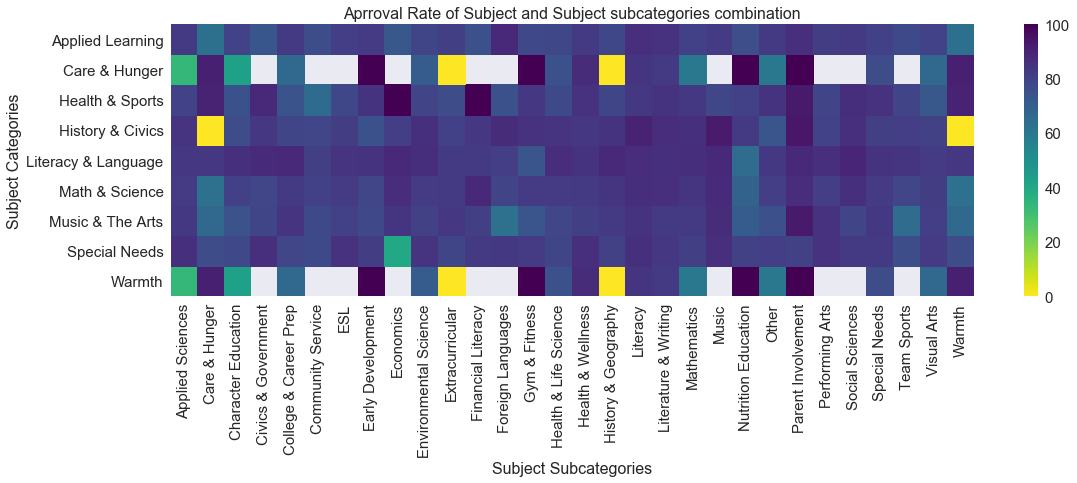

In [78]:
# now create a seaborn heatmap to see the approval rate of all the subject and subject sub category: cat_heatmap
cat_heatmap = (100 * subj_cat_aprv/subj_cat_total).unstack()

# heatmap plot
plt.figure(figsize=(18,5))
sns.set(font_scale=1.5)
ax = sns.heatmap(cat_heatmap, cmap='viridis_r')
plt.title("Aprroval Rate of Subject and Subject subcategories combination", fontsize=16)
plt.xlabel("Subject Subcategories", fontsize=16)
plt.ylabel('Subject Categories', fontsize=16)
plt.show()

Subjects like **Care & Hunger** and **Warmth** have 0% approval rate for some of the subcategorical subjects, thats because there is no submission in the subcategorical subject. All the yellow and green colors are the showing  poor approval rates for subjects and subject subcategory combination.<br>
**Applied Learning, Litracy & Language, Maths & Science** subjects have better approval rates ranging from **60%** to **80%**.

 ### 5) Time Series Analysis ###
In this time series analysis, we will do analysis on which month has the highest number of project proposals submitted? Which Day of the week has the highest number of submission? Which period of the day Teachers prefer submission of project proposals?

**For this analysis, we need to import the train.csv file again with the date_parser property set to the project_datetime column.**

In [80]:
# importing the train csv file again with the date_parser option: df_train
df_train = pd.read_csv('train.csv', date_parser='project_submitted_datetime')

In [82]:
# Create a new dataframe with only project_submitted_datetime and project_is_approved : project_date
project_date = df_train[['project_submitted_datetime','project_is_approved']]

In [83]:
# print the head of the new dataframe
project_date.head(2)

,project_submitted_datetime,project_is_approved
0,2016-11-18 14:45:59,1
1,2017-04-26 15:57:28,0


In [84]:
# convert the project_submitted_datetime column to a datetime data type
project_date.iloc[:,0] = pd.to_datetime(project_date['project_submitted_datetime'])

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [85]:
# make sure that the datetime column is now has data type as datetime64[ns]
project_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 2 columns):
project_submitted_datetime    182080 non-null datetime64[ns]
project_is_approved           182080 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 MB


In [105]:
# create a new column in the dataframe project_date to store date
#project_date["date"] = project_date['project_submitted_datetime'].apply( lambda x: x.date())

# create a new column in the dataframe project_date to store month
project_date["month"] = project_date['project_submitted_datetime'].apply( lambda x: x.month)

# create a new column in the dataframe project_date to store day of the week
#project_date["weekday"] = project_date['project_submitted_datetime'].apply( lambda x: x.weekday_name)

# create a new column in the dataframe project_date to store year
#project_date["year"] = project_date['project_submitted_datetime'].apply( lambda x: x.year)

# create a new column in the dataframe project_date to store only time
#project_date["time"] = project_date['project_submitted_datetime'].apply( lambda x: x.time())

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [88]:
# let's check how the new dataframe looks now and all the basic info
project_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 7 columns):
project_submitted_datetime    182080 non-null datetime64[ns]
project_is_approved           182080 non-null int64
date                          182080 non-null object
month                         182080 non-null int64
weekday                       182080 non-null object
year                          182080 non-null int64
time                          182080 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 9.7+ MB


In [89]:
# looks like everything a fine. Print the head of the dataframe
project_date.head(2)

,project_submitted_datetime,project_is_approved,date,month,weekday,year,time
0,2016-11-18 14:45:59,1,2016-11-18,11,Friday,2016,14:45:59
1,2017-04-26 15:57:28,0,2017-04-26,4,Wednesday,2017,15:57:28


** Now we need to divide the 24hrs into 4 different period of the day:**<br>
Create a range of the day, i.e. decide hours for morning, afternoon, evening and night. I have dicided the below
   * 06:00 - 11:59 Morning
   * 12:00 - 15:59 Afternoon
   * 16:00 - 19:59 Evening
   * 20:00 - 05:59 Night(nights are long)
   
   
This will be used to find out which period of the day teachers submit their proposal.

In [91]:
# Create a new column "period_of_day" which will store the categorical value of the period of day as specified above.
period = []
for i, row in project_date.iterrows():
    if (row[0].hour >= 6) and (row[0].hour < 12):
        period.append('Morning')
        
    if (row[0].hour >=12) and (row[0].hour < 16):
        period.append('Afternoon')
       
    if (row[0].hour >=16) and (row[0].hour < 20):
        period.append('Evening')
        
    if (row[0].hour >=20) & (row[0].hour < 24):
        period.append('Night')
        
    if (row[0].hour ==0) or (row[0].hour < 6):
        period.append('Night')
    
project_date['period_of_day'] = pd.DataFrame(period)

#printing the last 10 values of the dataframe to check if the values are right.
project_date.tail(10)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,project_submitted_datetime,project_is_approved,date,month,weekday,year,time,period_of_day
182070,2017-04-20 10:09:38,0,2017-04-20,4,Thursday,2017,10:09:38,Morning
182071,2016-05-28 23:50:29,1,2016-05-28,5,Saturday,2016,23:50:29,Night
182072,2016-07-21 16:18:35,1,2016-07-21,7,Thursday,2016,16:18:35,Evening
182073,2016-11-09 13:32:05,0,2016-11-09,11,Wednesday,2016,13:32:05,Afternoon
182074,2016-08-04 22:30:02,1,2016-08-04,8,Thursday,2016,22:30:02,Night
182075,2016-10-07 16:13:32,1,2016-10-07,10,Friday,2016,16:13:32,Evening
182076,2017-03-11 23:58:31,1,2017-03-11,3,Saturday,2017,23:58:31,Night
182077,2017-02-09 15:42:43,0,2017-02-09,2,Thursday,2017,15:42:43,Afternoon
182078,2016-12-28 14:20:07,1,2016-12-28,12,Wednesday,2016,14:20:07,Afternoon
182079,2016-05-15 20:25:14,1,2016-05-15,5,Sunday,2016,20:25:14,Night


In [92]:
# save intermideate dataframe to csv file
project_date.to_csv('date_time.csv', index=False)

Let's see how is the trend for the total number of proposal submission and approval rate in percentage, on all the dates in the training data.

In [94]:
# create a dataframe series variable to store the total number of dubmitted
# appilcation on a particular date: date_approved
date_count = project_date.groupby('date')['project_is_approved'].count()

# dataframe series variable to store % approval rate on a particular date: date_approved_rate
date_approved_rate = project_date.groupby('date')['project_is_approved'].mean()
date_approved_rate = date_approved_rate * 100 # convert it into %

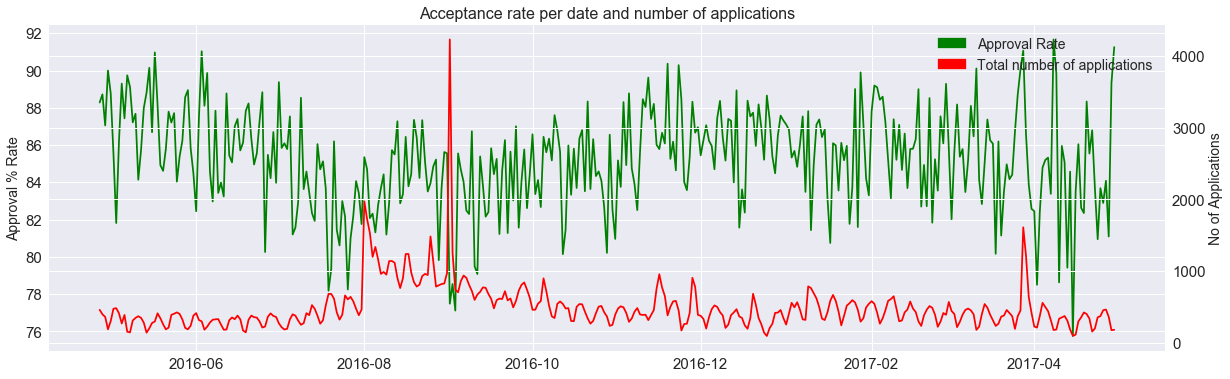

In [96]:
# plot the trend
fig = plt.figure(figsize=(20,6))
plt.title("Acceptance rate per date and number of applications", fontsize=16)
ax1 = plt.subplot(111)
plt.plot(date_approved_rate, 'green')
ax1.set_ylabel("Approval % Rate", fontsize=14)
ax2 = plt.subplot(111)
ax2 = ax1.twinx()
ax2.set_ylabel("No of Applications", fontsize=14)
plt.plot(date_count, "red")
red_patch = mpatches.Patch(color='red', label='Total number of applications')
green_patch = mpatches.Patch(color='green', label='Approval Rate')
plt.legend(handles=[green_patch, red_patch], fontsize=14)
plt.show()

**Findings**:<br>
   * The training dataset contains full one year data from end May 2016 to April 2017.
   * The high peaks near the month August and September and then falls back to the normal baseline is due to the fact that this time range is the start of the school year. Hence this time of the year more project proposals are submitted.
   * Approval rates are ranging from low to high as **75%** to nearly **92%**
   
Now it let's have a look at all the months and check which month has highest and lowest submission and approved application.

Since our month column is integer data type, we will first convert these number to equivalent name of the month. Then the months will be in ascending order of the alphabests and not the correct order of actual months. So we will convert them into correct order.<br>
We will also look at the plots of week of days trend and period of day trend.

In [107]:
# convert all the month number to equivalent month name.
project_date['month'] = project_date['month'].apply(lambda x: calendar.month_abbr[x])

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [109]:
# monthly order: month
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
project_date['month'] = pd.Categorical(project_date['month'], categories=month, ordered=True)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Similarly we have to convert the weekdays also in the correct order. Our dataframe contains the weekday column values as full name of the day. We will short the weekday name to **3 characters** and then will bring it to the correct order.

In [112]:
# convert full weekday name to 3 character: days
days = {'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed','Thursday':'Thu',
        'Friday':'Fri','Saturday':'Sat','Sunday':'Sun'}

project_date['weekday'] = project_date['weekday'].apply(lambda x: days[x])

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [113]:
# check if the column values have changed.
project_date['weekday'].head(2)

0    Fri
1    Wed
Name: weekday, dtype: object

In [114]:
# weekday order: weekday
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
project_date['weekday'] = pd.Categorical(project_date['weekday'], categories=weekday, ordered=True)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [115]:
# which month has the highest number of submission: monthly_count, monthly_approved
monthly_count = project_date.groupby('month')['project_is_approved'].agg('count')
monthly_approved = project_date.groupby('month')['project_is_approved'].agg('sum')

# which weekday has the highest number of submission: weekday_count, weekday_approved
weekday_count = project_date.groupby('weekday')['project_is_approved'].agg('count')
weekday_approved = project_date.groupby('weekday')['project_is_approved'].agg('sum')

# which part of the day has the highest submission: period_count, period_approved
period_count = project_date.groupby('period_of_day')['project_is_approved'].agg('count')
period_approved = project_date.groupby('period_of_day')['project_is_approved'].agg('sum')

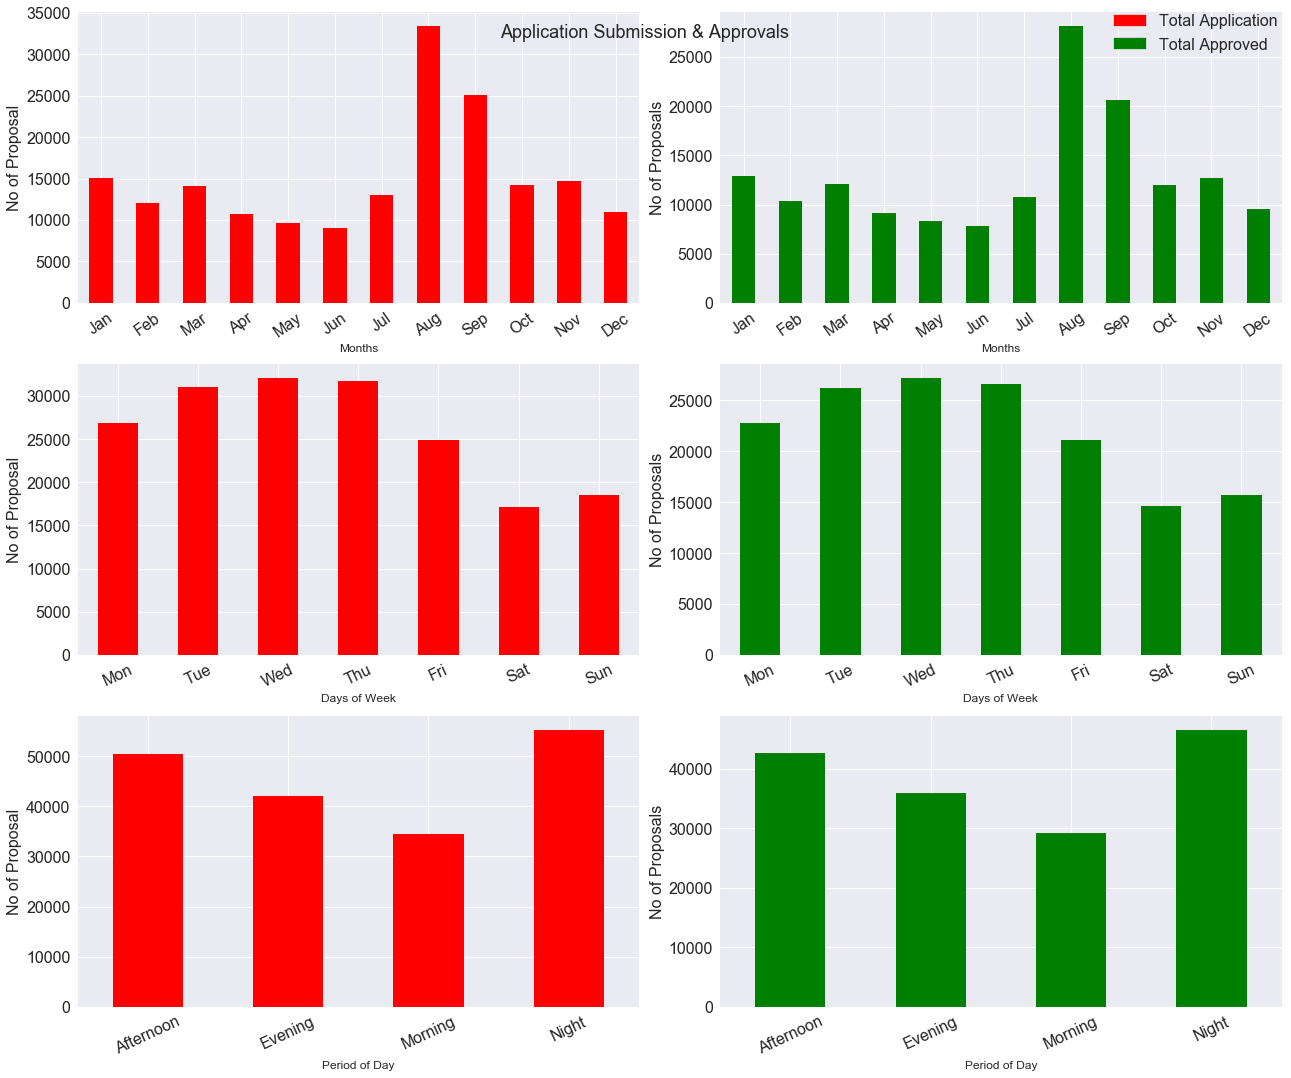

In [116]:
fig = plt.figure(figsize = (18,15))
fig.suptitle("Application Submission & Approvals", fontsize=18)
# Monthly plots
plt.subplot(3,2,1)
ax1 = monthly_count.plot.bar(rot=35, fontsize=16, color='red')
#plt.title("Total Proposal Submission by Months", fontsize=16)
plt.xlabel('Months', fontsize='large')
plt.ylabel('No of Proposal',fontsize=16)

plt.subplot(3,2,2)
ax2 = monthly_approved.plot(kind='bar', rot=35, fontsize=16, color='green')
#plt.title('Approved Proposal by Months', fontsize=16)
plt.xlabel('Months', fontsize='large')
plt.ylabel('No of Proposals', fontsize=16)

# Weekly plots
plt.subplot(3,2,3)
ax3 = weekday_count.plot.bar(rot=25, fontsize=16, color='red')
#plt.title("Total Proposal Submission by Weekdays", fontsize=16)
plt.xlabel('Days of Week', fontsize='large')
plt.ylabel('No of Proposal',fontsize=16)

plt.subplot(3,2,4)
ax4 = weekday_approved.plot(kind='bar', rot=25, fontsize=16, color='green')
#plt.title('Approved Proposal by Weekdays', fontsize=16)
plt.xlabel('Days of Week', fontsize='large')
plt.ylabel('No of Proposals', fontsize=16)

# period of the day
plt.subplot(3,2,5)
ax5 = period_count.plot.bar(rot=25, fontsize=16, color='red')
#plt.title("Total Proposal Submission by Period of Day", fontsize=16)
plt.xlabel('Period of Day', fontsize='large')
plt.ylabel('No of Proposal',fontsize=16)

plt.subplot(3,2,6)
ax6 = period_approved.plot(kind='bar', rot=25, fontsize=16, color='green')
#plt.title('Approved Proposal', fontsize=16)
plt.xlabel('Period of Day', fontsize='large')
plt.ylabel('No of Proposals', fontsize=16)

red_patch = mpatches.Patch(color='red', label='Total Applications')
green_patch = mpatches.Patch(color='green', label='Total Approved')
fig.legend([red_patch, green_patch], loc='upper right', fontsize=16, 
           labels=['Total Application','Total Approved'])
fig.tight_layout()
plt.show()

**Findings:**
   * April, May and June months are dull, the DonorsChoose.org does not get large number of proposals compared to other months.
   * Aug and Sep are very busy months in terms of proposal submission.
   * Tuesdays, Wednesday, Thursday are most preferred days of the week to submit the proposal. Infact slightly more than **50%** proposals are submitted on these 3 days. Saturdays and Sundays are the least preferred day of the week to submit a new proposal.
   * Most teachers choose night time (after 8:00 Pm and before 06:00 Am) to submit a proposal. Morning time from 6am to 12 noon is the least choosen period of day to submit a proposal.
   * Number of **approved proposals** are in the same order as of the total number of submission, which is visible on the graph. Also the approval rate is around **80%-85%** in all category.

### 6) How the number of previously posted proposals affect the approval rate. ###
In this section we will try to find out how the number of previously posted poposals by teachers affect the approval rate of of the proposals.

In [117]:
# create a dataframe with required column only: proposal_posted_past_count
proposal_posted_past_count = df_train[['teacher_number_of_previously_posted_projects','project_is_approved']].groupby(
'teacher_number_of_previously_posted_projects')['project_is_approved'].agg('count')

In [118]:
# Convert the series to dataframe:
proposal_posted_past_count = proposal_posted_past_count.to_frame()

# rename the column name to more sensible name.
proposal_posted_past_count.rename(columns={'project_is_approved':'total_count'}, inplace=True)

In [119]:
# create a dataframe with required column only: proposal_posted_past_approved
proposal_posted_past_approved = df_train[['teacher_number_of_previously_posted_projects',
                                          'project_is_approved']].groupby(
'teacher_number_of_previously_posted_projects')['project_is_approved'].agg('sum')

In [120]:
# Convert the series to dataframe:
proposal_posted_past_approved = proposal_posted_past_approved.to_frame()

# rename the column name to more sesible name.
proposal_posted_past_approved.rename(columns={'project_is_approved':'approved'}, inplace=True)

In [121]:
# merge these two dataframes into a single dataframe: proposal_posted_past
proposal_posted_past = pd.concat([proposal_posted_past_count, proposal_posted_past_approved], axis=1)
proposal_posted_past.head(2)

,total_count,approved
teacher_number_of_previously_posted_projects,,
0,50067,41022
1,26731,22213


In [122]:
# Let's add one more column to store the approval rate in percentage.
proposal_posted_past['aprv_perc'] = round((df_train[['teacher_number_of_previously_posted_projects',
                                              'project_is_approved']].groupby(
    'teacher_number_of_previously_posted_projects')['project_is_approved'].agg('mean'))*100, 2)

In [123]:
# re-labeling the index with short name as 'PPP' stands for Previously Posted Projects.
proposal_posted_past.index.names = ['PPP']

# print the first few rows of the dataframe to make sure we have the dataframe in the desired format.
proposal_posted_past.head()

,total_count,approved,aprv_perc
PPP,,,
0,50067,41022,81.93
1,26731,22213,83.10
2,17237,14461,83.90
3,11893,10006,84.13
4,8795,7421,84.38


In [125]:
# check number of unique submission in terms of previously posted proposals.
uniq_proposals = proposal_posted_past.index.nunique()
print("The unique number of previously posted proposals are", uniq_proposals)

The unique number of previously posted proposals are 401


There are 401 unique submissions have been done in the past. It will be difficut of us to use these many records for bar plot so, we will take only first 50 records. These records will include the number of proposals submitted by a **new teacher** i.e. who has no record of submitting any proposal in the past.

In [126]:
# Selecting the only first 50 rows for better understanding: proposal_posted_past_50
proposal_posted_past_50 = proposal_posted_past.head(50)

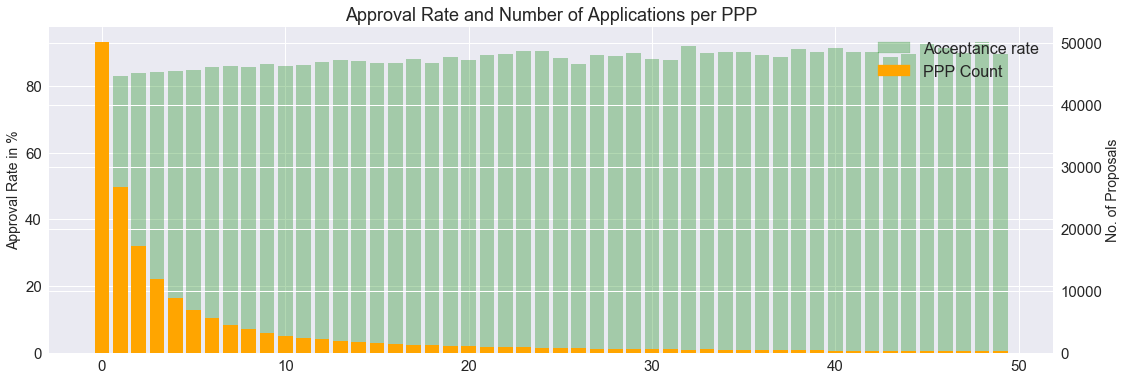

In [128]:
# plot
plt.figure(figsize=(18,6))
plt.title("Approval Rate and Number of Applications per PPP",fontsize = 18)
ax1 = plt.subplot(1,1,1)
plt.bar( proposal_posted_past_50.index, proposal_posted_past_50.aprv_perc,  color='g', alpha=0.3)
ax1.set_ylabel('Approval Rate in %', fontsize=14)
ax2 = plt.subplot(1,1,1)
ax2 = ax1.twinx()
ax2.set_ylabel('No. of Proposals', fontsize=14)
plt.bar( proposal_posted_past_50.index, proposal_posted_past_50.total_count, color = 'orange' )
orange_patch = mpatches.Patch(color='orange', label='PPP Count')
green_patch = mpatches.Patch(color='green', label='Acceptance rate', alpha=0.3)
plt.legend(handles=[green_patch, orange_patch])
plt.legend(handles=[green_patch, orange_patch], fontsize=16)
plt.show()

In [130]:
# Let's look at the last few rows of the table containig the previously posted projects
print(proposal_posted_past.tail(5))

     total_count  approved  aprv_perc
PPP                                  
440            1         1      100.0
441            1         1      100.0
443            1         1      100.0
450            1         1      100.0
451            2         2      100.0


**Findings:** As we can see the number of proposals by **new teachers**, that is teachers with no record of submitting proposal are more than **50K** which is almost like **one third** of the total number of proposals. 
   * It looks like the number of previously posted proposals doen't affect the approval rate.
   * We can see in the above graph that after the 10 previous submission, the number are almost same and approval rate is also ranging between very samll intervals.
   * There are teachers with very high number of previously posted proposals, with 100% approval rate. The approval rate is perfect becuase the number of such teahcers are very small at 1 or 2.

### 7) Requested resources and the price ###
In this section we will analyze the **total price range** and ** approval rate**. Each project has a total cost associated with it, we will categorize these prices into range of 1000 dollars, starting from 0 to maximum of the total price.

In [131]:
# Create new dataframe to store data resource.csv: resources_df
resources_df = pd.read_csv('resources.csv')

# Look at the dataset
resources_df.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [132]:
# get some basic info about the dataset resources_df
resources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
id             1541272 non-null object
description    1540980 non-null object
quantity       1541272 non-null int64
price          1541272 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


It looks like **_description_** column has some **missing values**. Let's find out how many are missing and will fill the missing values with most suitable values.

In [136]:
# description column has missing values
print("There were {} records with missing values, which have been filled with most suitable values now."
      .format(resources_df.description.isnull().sum()))

# fill missing values with blank space, which is more suitable than NaN values.
resources_df['description'].fillna('', inplace=True)

There were 292 records with missing values, which have been filled with most suitable values now.


In [138]:
# get the total price as 'amount' by multiplying quatities and price and round it to nerest to 2 decimal points.
resources_df['amount'] = round((resources_df['quantity'] * resources_df['price']),2)

# look at the dataframe
resources_df.head(2)

,id,description,quantity,price,amount
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95,44.85


In [140]:
# group by the id which will be ultimately used to join with the training dataset.
resources = resources_df.groupby('id')['quantity','price','amount'].agg(
    {'quantity':['sum','count'],'price':['mean'],'amount':['sum']})
resources.columns=['item_quantity_sum','unique_items','avg_price_per_item','total_cost']

In [141]:
# description column
resources_df['description'] = resources_df['description'].astype(str)
des=resources_df.groupby('id')['description'].apply(lambda des: "%s" % ', '.join(des))

In [142]:
# creating new column to the resources dataframe.
resources['description'] = des

# print the resources datframe to check all the columns are there what we have created above.
resources.head(2)

,item_quantity_sum,unique_items,avg_price_per_item,total_cost,description
id,,,,,
p000001,7,4,114.890000,833.63,"Cap Barbell 300 Pound Olympic Set, Grey, Cap B..."
p000002,21,14,36.849286,630.28,"10 Sony Headphones (BUY 9 GET 1 FREE), Belkin ..."


In [143]:
# reset index so that it can be merged to the training dataframe.
resources.reset_index(inplace=True)

In [144]:
#merge train data with resources
df_train=pd.merge(df_train,resources,on='id')
df_train.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,item_quantity_sum,unique_items,avg_price_per_item,total_cost,description
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,6,2,149.99,899.94,Apple - iPod nano� 16GB MP3 Player (8th Genera...
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20,1,20.00,400.00,Reebok Girls' Fashion Dance Graphic T-Shirt - ...


Now we have the **total cost** of each project in the training dataset. We can now plot total cost using the **density** plot to check the distribution of the total cost.

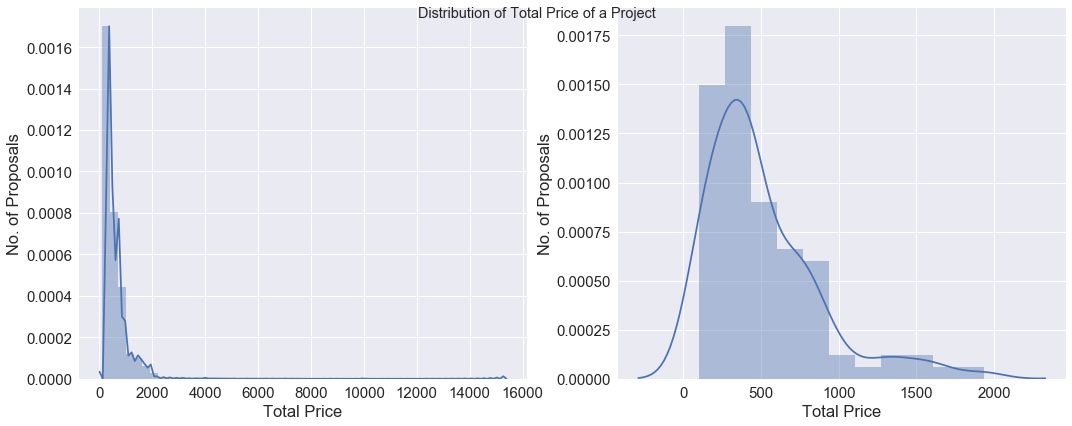

In [148]:
# density plot to see the distribution of total cost.
fig=plt.figure(figsize=(15,6))
plt.suptitle('Distribution of Total Price of a Project', fontsize='x-large')
plt.subplot(1,2,1)
sns.distplot(df_train['total_cost'])
plt.xlabel('Total Price')
plt.ylabel('No. of Proposals')

plt.subplot(1,2,2)
sns.distplot(df_train['total_cost'].head(100))
plt.xlabel('Total Price')
plt.ylabel('No. of Proposals')
fig.tight_layout()
plt.show()

The distribution is right skewed. There is a big down fall in the number of projects which requested for resources worth very high. Let's see all the numbers in the below table related to total cost.

In [149]:
# pandas describe method
df_train.total_cost.describe()

count    182080.000000
mean        545.748958
std         548.198713
min         100.000000
25%         245.997500
50%         397.750000
75%         691.920000
max       15299.690000
Name: total_cost, dtype: float64

**Findings**
   * The minimum total amount requested for a project is __$\$$100__ and the maximum is around __$\$$15300__.
   * Standard deviation is big, that's because the distribution is not normal.
   * __75%__ projects requested about **$\$$690.**

Let's check the approval rate based on the total cost. To do this we will first divide the dataset into category of price ranges.

In [151]:
# we will add a new column 'price_range' to dataframe train_data. to do this we need two list.
# 1) to hold the range numbers and 2) to hold the label for the range defined in 1: price_range
price_range = np.arange(0,int(round(df_train.total_cost.max()))+1000, 1000)

In [152]:
price_range # to make sure we have the correct range.

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000])

In [153]:
# define a function which will give as previous and the next item as well in the for loop along with current item.
from itertools import tee, islice, chain

def previous_and_next(some_iterable):
    """ this function returns previous and the next item as well in the for loop along with current item. """
    prevs, items, nexts = tee(some_iterable, 3)
    prevs = chain([None], prevs)
    nexts = chain(islice(nexts, 1, None), [None])
    return zip(prevs, items, nexts)

In [154]:
# get labels for all the price range.
price_labels = []
for previous, item, nxt in previous_and_next(price_range):
    if item !=0:
        price_labels.append(str(previous)+'-'+str(item))

price_labels

['0-1000',
 '1000-2000',
 '2000-3000',
 '3000-4000',
 '4000-5000',
 '5000-6000',
 '6000-7000',
 '7000-8000',
 '8000-9000',
 '9000-10000',
 '10000-11000',
 '11000-12000',
 '12000-13000',
 '13000-14000',
 '14000-15000',
 '15000-16000']

In [155]:
# add column to dataframe df_train to specify price range category based on total cost.
df_train['price_range'] = pd.cut(df_train.total_cost, price_range, labels=price_labels)

# print few records and check if the price range are correctly labelled.
df_train.head(5)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,item_quantity_sum,unique_items,avg_price_per_item,total_cost,description,price_range
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,NaN,My students need 6 Ipod Nano's to create and d...,26,1,6,2,149.990,899.94,Apple - iPod nano� 16GB MP3 Player (8th Genera...,0-1000
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,NaN,My students need matching shirts to wear for d...,1,0,20,1,20.000,400.00,Reebok Girls' Fashion Dance Graphic T-Shirt - ...,0-1000
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,NaN,My students need the 3doodler. We are an SEM s...,5,1,1,1,469.990,469.99,3doodler Start Full Edu Bundle,0-1000
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,NaN,My students need balls and other activity equi...,16,0,5,5,136.894,684.47,"BALL PG 4'' POLY SET OF 6 COLORS, BALL PLAYGRO...",0-1000
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,NaN,My students need a water filtration system for...,42,1,2,1,355.500,711.00,Crown Berkey Water Filter With 2 Black and 2 P...,0-1000


In [157]:
# group by price range and calculate the number of projects submitted, total number of approved projects
# and approval rate in each price range: fund_amount_count, fund_amount_approved, fund_amount_aprv_perc
fund_amount_count = pd.DataFrame(df_train.groupby('price_range')['project_is_approved'].agg('count'))
fund_amount_approved = pd.DataFrame(df_train.groupby('price_range')['project_is_approved'].agg('sum'))
fund_amount_aprv_perc=pd.DataFrame(df_train.groupby('price_range')['project_is_approved'].agg('mean'))

In [158]:
# change the column name of each dataframe created above
fund_amount_count.rename(columns={'project_is_approved':'project_count'}, inplace=True)
fund_amount_approved.rename(columns={'project_is_approved':'approved'}, inplace=True)
fund_amount_aprv_perc.rename(columns={'project_is_approved':'aprv_perc'}, inplace=True)

In [159]:
# merger all the three new dataframes created above to a single dataframe: fund_amount
fund_amount=pd.concat([fund_amount_count, fund_amount_approved, fund_amount_aprv_perc], axis=1)
fund_amount.head(2) # just to have a look and feel of the dataframe

,project_count,approved,aprv_perc
price_range,,,
0-1000,162735,138582.0,0.851581
1000-2000,17321,14042.0,0.810692


In [160]:
# cheking basic info about the new dataframe
fund_amount.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 16 entries, 0-1000 to 9000-10000
Data columns (total 3 columns):
project_count    16 non-null int64
approved         15 non-null float64
aprv_perc        15 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


There are 1 less record in **_approved_** and **_aprv_cerc_** columns. There must be no project within some price range. So we can fill those columns with value 0(zero).

In [161]:
# since there could be no record in some range there are missing records in the column. so will fill all nan values
# with 0
fund_amount = fund_amount.fillna(0, axis=1)
fund_amount.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 16 entries, 0-1000 to 9000-10000
Data columns (total 3 columns):
project_count    16 non-null int64
approved         16 non-null float64
aprv_perc        16 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


In [162]:
# above we have seen the values of the column with floating data type. we will take the corrective action as below.
fund_amount['approved'] = fund_amount['approved'].apply(lambda x: int(round(x)))
fund_amount['aprv_perc'] = fund_amount['aprv_perc'].apply(lambda x: (round(x*100,2)))
fund_amount.head(2)

,project_count,approved,aprv_perc
price_range,,,
0-1000,162735,138582,85.16
1000-2000,17321,14042,81.07


In [164]:
# sort the dataframe according to teh project count in descending order
fund_amount = fund_amount.sort_values(by='project_count', ascending=False)

In [169]:
# create a new dataframe with last 14 records of the fund_amount
fund_amount_tail = fund_amount.tail(14)

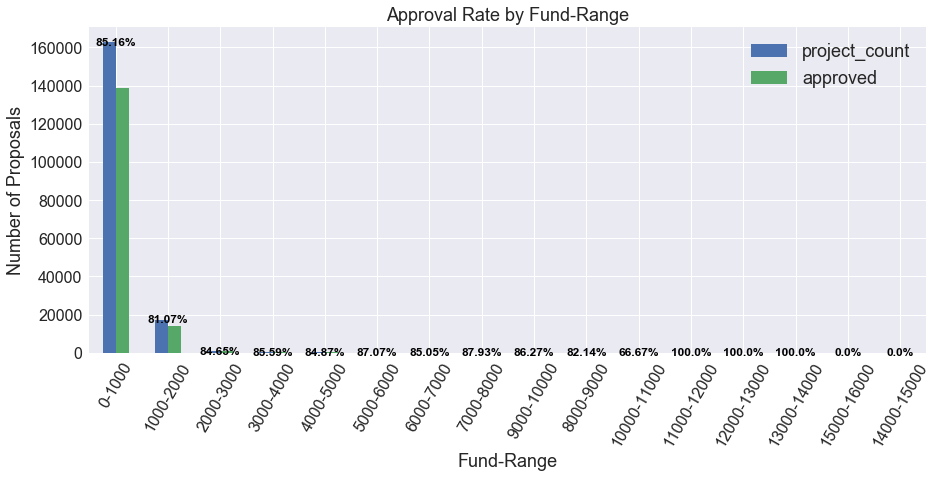

In [174]:
# plot the approval rate based on the total cost, subplot 1
ax = fund_amount[['project_count','approved']].plot.bar(legend=False, figsize=(15,6), fontsize=16, rot=60)
labels = []
for j in fund_amount.columns:
    if j=='aprv_perc':
        for i in fund_amount.index:
            label = fund_amount.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        #if label=='0%':
        ax.text(x + width, y + height, label, ha='center', va='center',
               fontsize=12, fontweight="bold", color="black")
plt.title("Approval Rate by Fund-Range", fontsize=18 )
plt.xlabel("Fund-Range", fontsize=18)
plt.ylabel("Number of Proposals", fontsize=18)
plt.legend(fontsize=18)
plt.show()

** For better visibility of the above chart** below is the bar chart of the tail of the dataframes.

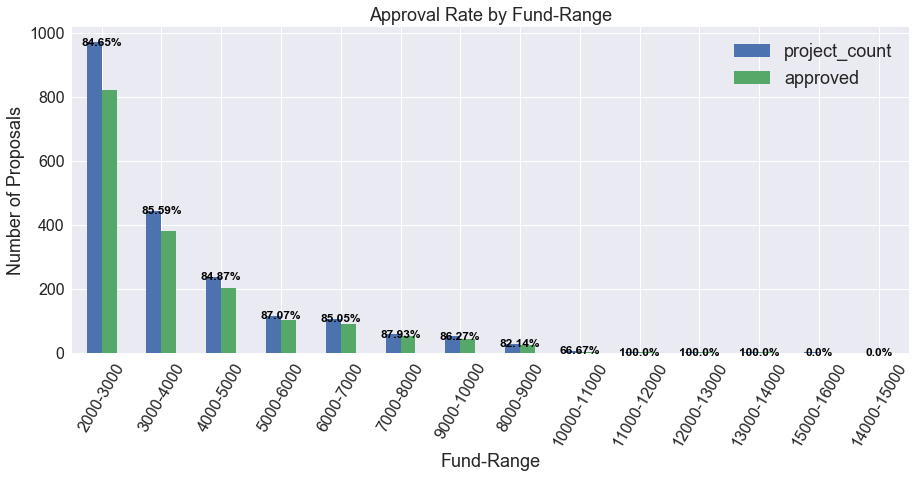

In [170]:
ax = fund_amount_tail[['project_count','approved']].plot.bar(legend=False, figsize=(15,6), fontsize=16, rot=60)
labels = []
for j in fund_amount_tail.columns:
    if j=='aprv_perc':
        for i in fund_amount_tail.index:
            label = fund_amount.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()
            ax.text(x + width, y + height, label, ha='center', va='center',
               fontsize=12, fontweight="bold", color="black")
            
plt.title("Approval Rate by Fund-Range", fontsize=18 )
plt.xlabel("Fund-Range", fontsize=18)
plt.ylabel("Number of Proposals", fontsize=18)
plt.legend(fontsize=18)
plt.show()

As we can see, as the price **increases** the number of projects **decreases** significantly. Approval rates of **100%** are the price range with only one project which makes it 50-50 chance. **0%** are the one with only 1 proposal and got rejected. 

### 8) Text Analysis: In this section we will perform some text related anylsis on text columns of the trainig dataset. ###
**8.1. Project Title:** What are the highly used words in the project title? what are the numbers of words per project title?<br>
Let's start with looking at some of the titles used by teachers for project submission. After that we will check out the words which have been used mostly in the project title using **WordClouds**.

In [176]:
# group by project title and count approval rates: title_approval_rate
title_approval_rate=df_train.groupby('project_title')['project_is_approved'].agg(['count','sum','mean'])

# rename the column names else all the columns will have same name 'project_is_approved'
title_approval_rate.columns=['Project Count','Approved','Approval Rate']

# converting approval rate into percentage (%) and round off to 2 decimal points.
title_approval_rate['Approval Rate'] = title_approval_rate['Approval Rate'].apply(lambda x: round(x*100, 2))

# sort the dataframe in descending order of no of total projects
title_approval_rate=title_approval_rate.sort_values(by='Project Count',ascending=False)
title_approval_rate.head(20)

,Project Count,Approved,Approval Rate
project_title,,,
Flexible Seating,377,298,79.05
Wiggle While You Work,150,137,91.33
Wiggle While We Work,149,136,91.28
Can You Hear Me Now?,144,135,93.75
Wiggle While You Work!,134,122,91.04
Wiggle While We Work!,123,116,94.31
"We Like to Move It, Move It!",100,85,85.00
Listen Up!,83,77,92.77
Technology in the Classroom,79,69,87.34


**Wiggle While You Work!** is the title which has been used very significantly and the success rate is more than **90%** which is amazing. There are different version of the same sentence available in the project title.<br>
Let's check out the wordcloud for all the project titles and then **approved** and **rejected** project titles.

In [184]:
# add some more stop words other than english language stop words.
stopword=set(STOPWORDS)
stopword.add('will')
stopword.add('student')
stopword.add('students')
stopword.add('child')
stopword.add('children')
stopword.add('teacher')
stopword.add('school')
stopword.add('needs')
stopword.add('help')
stopword.add('learn')
stopword.add('need')
stopword.add('part')
stopword.add('make')
stopword.add('making')

In [180]:
# create a string variable and store all the words from project title column: words, clean_words
words= ' '.join(df_train.project_title.tolist())
clean_words = " ".join([word for word in words.split() ])

In [181]:
# convert all the words in the clean_words variable to lower case so that the added stop can be effective.
clean_words_lower = clean_words.lower()

In [185]:
# create word cloud from the variable clean_words: wordcloud
wordcloud = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(clean_words_lower)

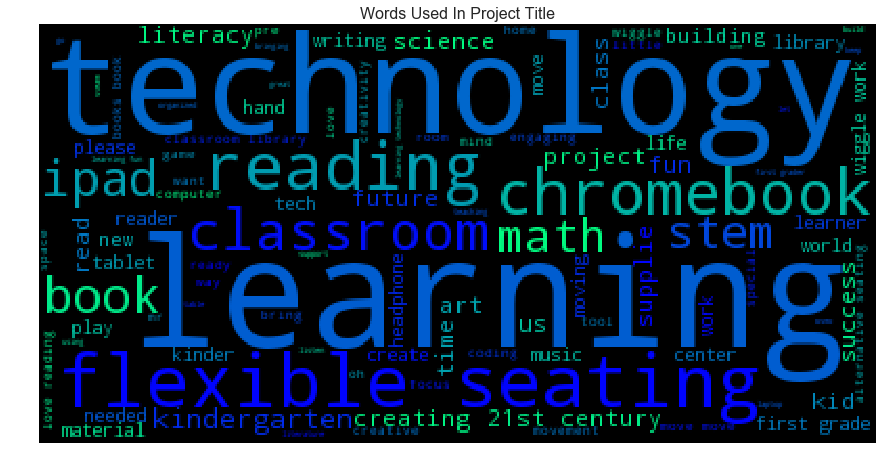

In [186]:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Words Used In Project Title", fontsize=16)
plt.show()

**Technology** and related words are most used words in the project title. Science and math are also seems very popular words. Words like **classroom, books, building, flexible seating** reflects the infrastructure need of the students for better **learning**.<br>
Let's check the approved and rejected word clouds of the project title.

In [187]:
# words from approved project titles and cleaned it: words_approved, clean_words_approved
words_approved= ' '.join((df_train['project_title'][df_train.project_is_approved==1]).tolist())
clean_words_approved = " ".join([word for word in words_approved.split()])

# words from rejected project titles and cleaned it: words_reject, clean_words_reject
words_reject = ' '.join((df_train['project_title'][df_train.project_is_approved==0]).tolist())
clean_words_reject = " ".join([word for word in words_reject.split()])

In [188]:
# converting all the words to lower case to make more suitable clouds.
clean_words_approved = clean_words_approved.lower()
clean_words_reject = clean_words_reject.lower()

In [189]:
# approved word cloud: wordcloud_aprv
wordcloud_aprv = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='autumn').generate(clean_words_approved)

# rejected word cloud: wordcloud_reject
wordcloud_reject = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='autumn').generate(clean_words_reject)

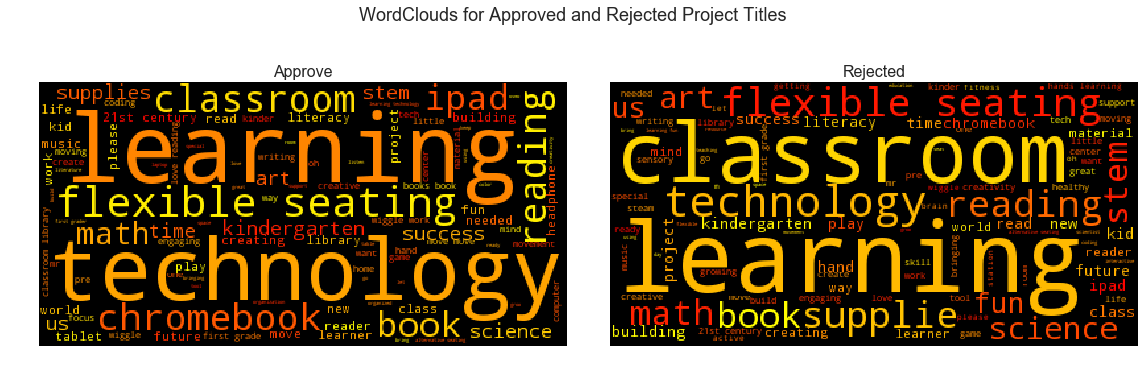

In [190]:
# world clouds plotting
fig = plt.figure(figsize=(16, 6))
plt.suptitle("WordClouds for Approved and Rejected Project Titles", fontsize=18)

# approved project title
plt.subplot(121)
plt.title("Approve", fontsize=16)
plt.imshow(wordcloud_aprv)
plt.axis('off')

# rejected project title
plt.subplot(122)
plt.imshow(wordcloud_reject)
plt.title("Rejected", fontsize=16)
plt.axis('off')
fig.tight_layout()
plt.show()

Doesn't look much difference, but words like **Classroom** related to infrastructure in the project title tends to be rejected more.<br>
Let's check the **number of words** in teh project title and approval rates.

In [192]:
# create an empty dataframe to store the text_statistics of the project title column: title_text_stats
title_text_stats=pd.DataFrame()

#import the column of approval status from train_data
title_text_stats['project_is_approved']=df_train['project_is_approved']

# word count in the title of the project
title_text_stats['word_count']=df_train['project_title'].apply(lambda x: len(str(x).split()))

# unique word count in the title of the project
title_text_stats['count_unique_word']=df_train['project_title'].apply(lambda x: len(set(str(x).split())))

# word count percent in each title:
title_text_stats['word_unique_percent']=(title_text_stats['count_unique_word']*100)/title_text_stats['word_count']

In [193]:
# look at the dataframe just created
title_text_stats.head(2)

,project_is_approved,word_count,count_unique_word,word_unique_percent
0,1,4,4,100.0
1,0,5,5,100.0


In [194]:
# word count per project, group by number of words in the project title: project_words_count
project_words_count = title_text_stats.groupby('word_count')['project_is_approved'].agg(['count','sum','mean'])
project_words_count.columns=['Word Counts','Approved', 'Approval Rate']

In [195]:
# make sure that the approval rate is in percentage(%), and round off to 2 decimal places.
project_words_count['Approval Rate'] = project_words_count['Approval Rate'].apply(lambda x: round(x*100, 2))
project_words_count.head(2)

,Word Counts,Approved,Approval Rate
word_count,,,
1,52,45,86.54
2,14699,12019,81.77


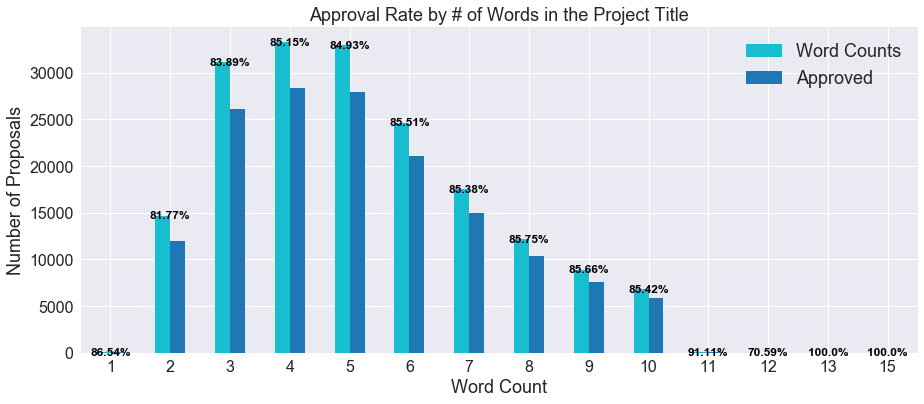

In [196]:
# plot number of words, approved projects and approval rates bases on Number of words in the project title.
ax = project_words_count[['Word Counts','Approved']].plot.bar(legend=False, figsize=(15,6),
                                                              cmap='Vega10_r',fontsize=16, rot=360)
labels = []
for j in project_words_count.columns:
    if j=='Approval Rate':
        for i in project_words_count.index:
            label = project_words_count.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        #if label=='0%':
        ax.text(x + width, y + height, label, ha='center', va='center',
               fontsize=12, fontweight="bold", color="black")
plt.title("Approval Rate by # of Words in the Project Title", fontsize=18 )
plt.xlabel("Word Count", fontsize=18)
plt.ylabel("Number of Proposals", fontsize=18)
plt.legend(fontsize=18)
plt.show()

We can see the project title contains 1 to 15 words. There are large number of projects with 3-6 words in the project title and approval rates rages between **83%-86%**. There are very few projects with title containing 11-15 words.

### 8.2) Essay: ###
Eassy gives opportunity to the teachers to tell their story about the class, students, project and how the project will improve the **learning**. It would be interesting to see what kind of words teachers have used in the submitted, approved and rejected proposals. 

On May 17th, 2016, the DonorsChoose.org application switched from having 4 essay prompts to just 2 prompts, so from that point forward, only project_essay_1 and project_essay_2 contain text, and project_essay_3 and project_essay_4 have NaNs.

Here's a summary of the essay prompts before and after that date.

**Before May 17th, 2016:**

project_essay_1: "Introduce us to your classroom"
project_essay_2: "Tell us more about your students"
project_essay_3: "Describe how your students will use the materials you're requesting"
project_essay_4: "Close by sharing why your project will make a difference"

__*May 17th, 2016 and beyond: *__

project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."
project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"

so we have several options here: split dataset into two parts and train different models on them, drop samples before this date, combine 1 with 2 and 3 with 4 for old records or do nothing. I prefer combining old records.

In [198]:
# Make new essay_1 column 'new_essay_1'.
df_train['new_essay_1']=df_train['project_essay_1']
df_train.loc[df_train.project_essay_3.notnull(),'new_essay_1']=df_train.loc[df_train.project_essay_3.notnull(),
                            'project_essay_1']+ df_train.loc[df_train.project_essay_3.notnull(),'project_essay_2']

In [200]:
# Make new essay_2 column 'new_essay_2'.
df_train['new_essay_2']=df_train['project_essay_2']
df_train.loc[df_train.project_essay_3.notnull(),'new_essay_2']=df_train.loc[df_train.project_essay_3.notnull(),
                            'project_essay_3']+ df_train.loc[df_train.project_essay_3.notnull(),'project_essay_4']

In [201]:
# make sure that the 2 new columns have been created and don't have NaNs values.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 24 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

All looks good and we are good to create **word cloud** for eassay_1 and essay_2.

In [202]:
# words from new essay 1 and cleaned it: new_essay_1_words, new_essay_1_clean_words
new_essay_1_words= ' '.join(df_train.new_essay_1.tolist())
new_essay_1_clean_words = " ".join([word for word in new_essay_1_words.split() ])

# words from approved project essay 1 and cleaned it: new_essay_1_words_approved, new_essay_1_clean_words_approved
new_essay_1_words_approved= ' '.join((df_train['new_essay_1'][df_train.project_is_approved==1]).tolist())
new_essay_1_clean_words_approved = " ".join([word for word in new_essay_1_words_approved.split()])

# words from rejected project essay 1 and cleaned it: new_essay_1_words_reject, new_essay_1_clean_words_reject
new_essay_1_words_reject = ' '.join((df_train['new_essay_1'][df_train.project_is_approved==0]).tolist())
new_essay_1_clean_words_reject = " ".join([word for word in new_essay_1_words_reject.split()])

In [203]:
# converting all the words to lower case to make more suitable clouds.
new_essay_1_clean_words_approved = new_essay_1_clean_words_approved.lower()
new_essay_1_clean_words_reject = new_essay_1_clean_words_reject.lower()
new_essay_1_clean_words = new_essay_1_clean_words.lower()

In [204]:
# word cloud for new essay 1, all submission: new_essay_1_wordcloud
new_essay_1_wordcloud = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='white',
                      colormap='viridis_r').generate(new_essay_1_clean_words)

# approved word cloud: new_essay_1_wordcloud_aprv
new_essay_1_wordcloud_aprv = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(new_essay_1_clean_words_approved)

# rejected word cloud: new_essay_1_wordcloud_reject
new_essay_1_wordcloud_reject = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(new_essay_1_clean_words_reject)

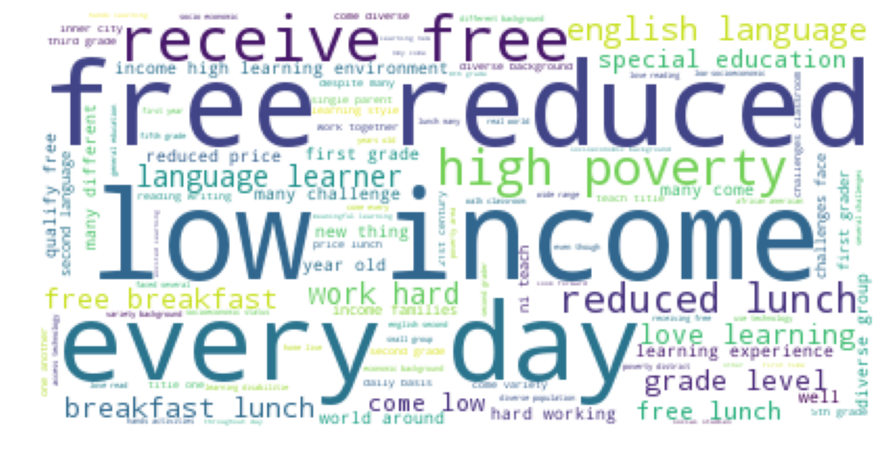

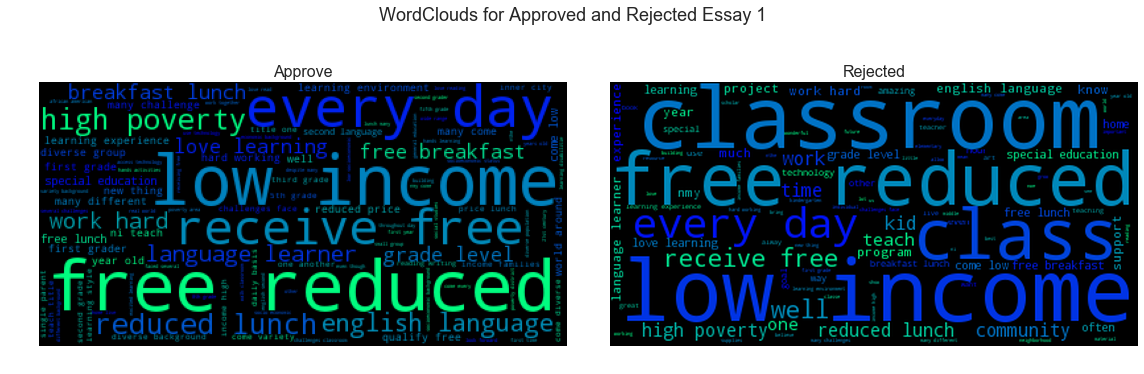

In [205]:
plt.figure(figsize=(15, 12))
plt.imshow(new_essay_1_wordcloud, interpolation='hamming')
#plt.title('Word Cloud for Essay 1')
plt.axis('off')

# world clouds plotting
fig = plt.figure(figsize=(16, 6))
plt.suptitle("WordClouds for Approved and Rejected Essay 1", fontsize=18)

# approved project title
plt.subplot(121)
plt.title("Approve", fontsize=16)
plt.imshow(new_essay_1_wordcloud_aprv, interpolation='kaiser')
plt.axis('off')

# rejected project title
plt.subplot(122)
plt.imshow(new_essay_1_wordcloud_reject, interpolation='spline36')
plt.title("Rejected", fontsize=16)
plt.axis('off')
fig.tight_layout()
plt.show()

As we would have expected most of the frequently used words are related to **students** as this field required to write down about students and class. There is no much difference in the frequently used words in approved and rejected proposals, except **Classroom** word which has used frequently in proposals which has been rejected.<br>
Now Let's check the word cloud for **essay_2**.

In [206]:
# words from new essay 2 and cleaned it: new_essay_2_words, new_essay_2_clean_words
new_essay_2_words= ' '.join(df_train.new_essay_2.tolist())
new_essay_2_clean_words = " ".join([word for word in new_essay_2_words.split() ])

# words from approved project essay 2 and cleaned it: new_essay_2_words_approved, new_essay_2_clean_words_approved
new_essay_2_words_approved= ' '.join((df_train['new_essay_2'][df_train.project_is_approved==1]).tolist())
new_essay_2_clean_words_approved = " ".join([word for word in new_essay_2_words_approved.split()])

# words from rejected project essay 2 and cleaned it: new_essay_2_words_reject, new_essay_2_clean_words_reject
new_essay_2_words_reject = ' '.join((df_train['new_essay_2'][df_train.project_is_approved==0]).tolist())
new_essay_2_clean_words_reject = " ".join([word for word in new_essay_2_words_reject.split()])

In [207]:
# converting all the words to lower case to make more suitable clouds.
new_essay_2_clean_words_approved = new_essay_2_clean_words_approved.lower()
new_essay_2_clean_words_reject = new_essay_2_clean_words_reject.lower()
new_essay_2_clean_words = new_essay_2_clean_words.lower()

In [208]:
# word cloud for new essay 2, all submission: new_essay_2_wordcloud
new_essay_2_wordcloud = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='white',
                      colormap='viridis_r').generate(new_essay_2_clean_words)

# approved word cloud: new_essay_2_wordcloud_aprv
new_essay_2_wordcloud_aprv = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(new_essay_2_clean_words_approved)

# rejected word cloud: new_essay_1_wordcloud_reject
new_essay_2_wordcloud_reject = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(new_essay_2_clean_words_reject)

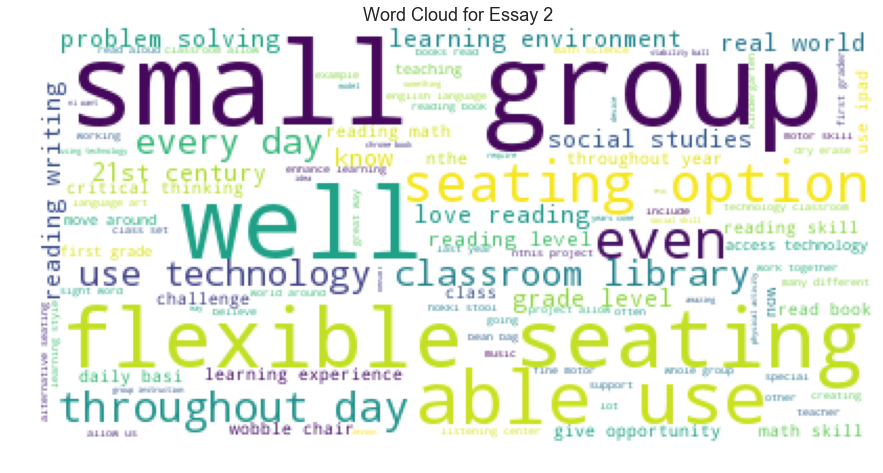

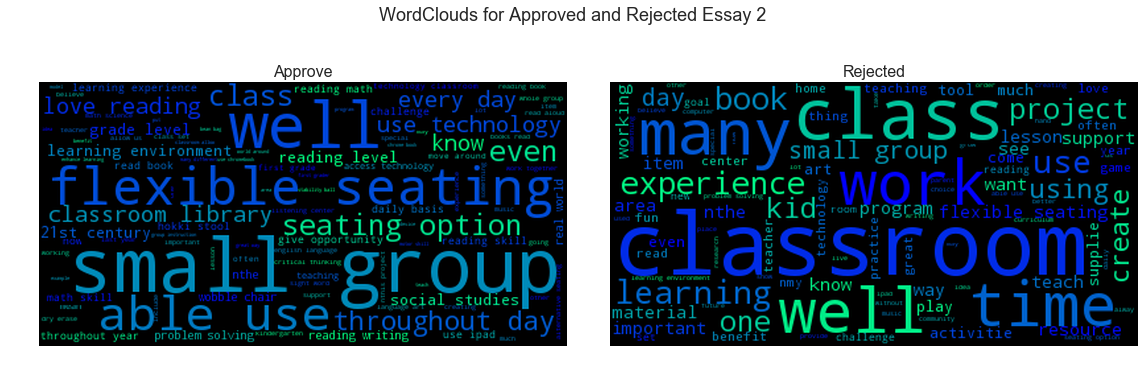

In [213]:
plt.figure(figsize=(15, 12))
plt.imshow(new_essay_2_wordcloud, interpolation='kaiser')
plt.title('Word Cloud for Essay 2')
plt.axis('off')

# world clouds plotting
fig = plt.figure(figsize=(16, 6))
plt.suptitle("WordClouds for Approved and Rejected Essay 2", fontsize=18)

# approved project title
plt.subplot(121)
plt.title("Approve", fontsize=16)
plt.imshow(new_essay_2_wordcloud_aprv, interpolation='spline36')
plt.axis('off')

# rejected project title
plt.subplot(122)
plt.imshow(new_essay_2_wordcloud_reject, interpolation='spline36')
plt.title("Rejected", fontsize=16)
plt.axis('off')
fig.tight_layout()
plt.show()

As we can see **essay_2** is more about problems which students face, things which will help them and how exactly will they help to improve the learning. There seems to be many difference in frequency of words used in essay_2 for approved and rejected proposals.

### 8.3 Resource Summary: ###
Are there common words in approved and rejected projects, which are highly used in proposals. Let's find it out by creating a word cloud for this field.

In [210]:
# words from project_resource_summary and cleaned it: resource_summary_words, resource_summary_clean_words
resource_summary_words= ' '.join(df_train.project_resource_summary.tolist())
resource_summary_clean_words = " ".join([word for word in resource_summary_words.split() ])

# words from approved project summary and cleaned it: resource_summary_words_approved,
# resource_summary_clean_words_approved
resource_summary_words_approved= ' '.join((df_train['project_resource_summary']
                                           [df_train.project_is_approved==1]).tolist())
resource_summary_clean_words_approved = " ".join([word for word in resource_summary_words_approved.split()])

#words from rejected project summary and cleaned it:resource_summary_words_reject, resource_summary_clean_words_reject
resource_summary_words_reject = ' '.join((df_train['project_resource_summary']
                                          [df_train.project_is_approved==0]).tolist())
resource_summary_clean_words_reject = " ".join([word for word in resource_summary_words_reject.split()])

In [211]:
# converting all the words to lower case to make more suitable clouds.
resource_summary_clean_words_approved = resource_summary_clean_words_approved.lower()
resource_summary_clean_words_reject = resource_summary_clean_words_reject.lower()
resource_summary_clean_words = resource_summary_clean_words.lower()

In [212]:
# word cloud for project_resource_summary, all submission: resource_summary_wordcloud
resource_summary_wordcloud = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='white',
                      colormap='viridis_r').generate(resource_summary_clean_words)

# approved word cloud: resource_summary_wordcloud_aprv
resource_summary_wordcloud_aprv = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(resource_summary_clean_words_approved)

# rejected word cloud: resource_summary_wordcloud_reject
resource_summary_wordcloud_reject = WordCloud(stopwords=stopword,
                      width=400,height=200,
                     max_words=100,min_font_size=1,mode='RGB',background_color='black',
                      colormap='winter').generate(resource_summary_clean_words_reject)

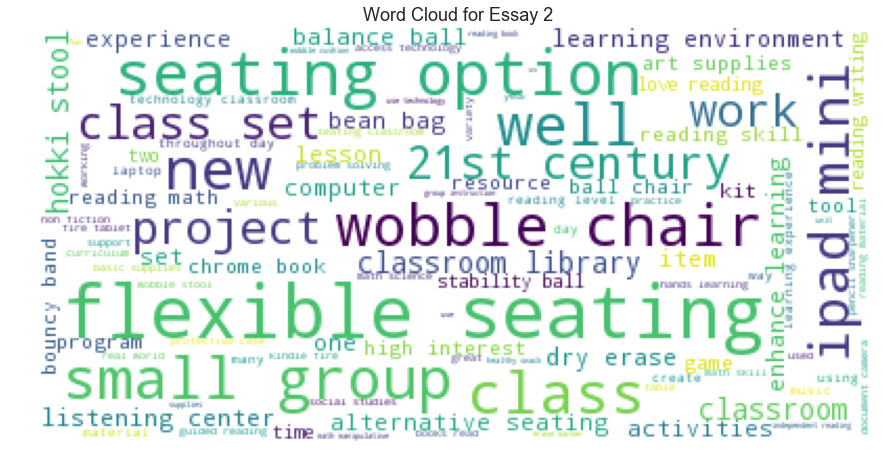

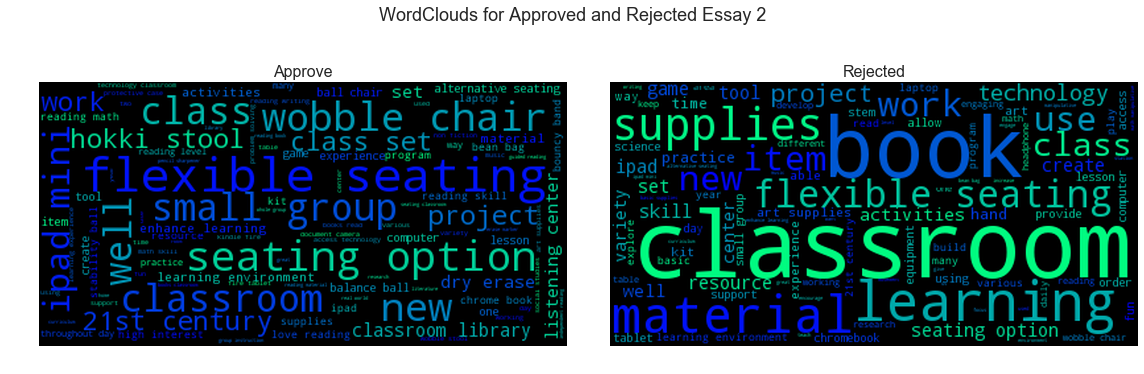

In [214]:
plt.figure(figsize=(15, 12))
plt.imshow(resource_summary_wordcloud, interpolation='kaiser')
plt.title('Word Cloud for Essay 2')
plt.axis('off')

# world clouds plotting
fig = plt.figure(figsize=(16, 6))
plt.suptitle("WordClouds for Approved and Rejected Essay 2", fontsize=18)

# approved project title
plt.subplot(121)
plt.title("Approve", fontsize=16)
plt.imshow(resource_summary_wordcloud_aprv, interpolation='spline36')
plt.axis('off')

# rejected project title
plt.subplot(122)
plt.imshow(resource_summary_wordcloud_reject, interpolation='spline36')
plt.title("Rejected", fontsize=16)
plt.axis('off')
fig.tight_layout()
plt.show()

The most frequently used words are related to the object, like chair, devices like ipad mini and words that describes these objects. As the summary is about the resources requested we would expect something like this to improve the learning environement. The are sports accessories related words are also frequently used in describing the resources. The words are almost same in both, approved and rejected proposals, just frequency of these words are different.

----------------------------------------------------------------------------------------------------------------------